#  Pandemic Patterns - Navigating the Impact on Illinois’ Small Businesses


Github Link: https://github.com/vsrrevanth/CS418Covid19ImpactOnSmallBusinesses

## Project Introduction

The emergence of the COVID-19 pandemic has precipitated an unprecedented economic challenge, particularly for small businesses across the globe. Illinois, like many regions, has felt the weight of this crisis acutely. In response, our Data Science team has embarked on a mission to analyze and visualize the multifaceted impact of COVID-19 on small businesses within the state of Illinois. We aim to carefully gather, analyze, and visualize data to uncover vital insights revealing the challenges small businesses in Illinois are facing. Our goal is to then suggest strategies to help them become more resilient in the aftermath of the pandemic.


The impact of COVID-19 on small businesses can be seen in various aspects, such as:

Revenue: Small businesses have experienced a significant drop in revenue due to reduced consumer spending, business closures, and supply chain disruptions.

Employment: Many small businesses have been forced to lay off employees or reduce their work hours due to reduced demand for their products or services.

Financial Stability: The pandemic has created financial instability for small businesses, with many struggling to meet their expenses, pay their bills, and access loans or government support.

Data Cleaning: The U.S. Small Business Administration (SBA) and the Illinois Department of Commerce and Economic Development were two of the sources from which we gathered our data. We cleansed the data by eliminating duplicates, missing values, and outliers.

## Changes since our Initial Proposal

Our initial proposal was to analyze the impact of COVID-19 on small businesses in the United States. We made the decision to concentrate on Illinois after realizing that the dataset would be too big to evaluate in the allotted period. Our dataset now includes additional factors including the number of employees, the industry, and the location.

# Data Preparation

The data for our project was meticulously prepared to ensure accuracy and reliability in our analysis of the impact of COVID-19 on small businesses in Illinois. Here's a summary of our data preparation process:

## Initial Focus and Data Changes

- **Project Scope Adjustment**: Originally intended to cover the entire United States, the scope was refined to focus solely on Illinois due to dataset manageability concerns. This necessitated additional data considerations including business size, industry, and geographical location.

## Data Cleaning and Preparation

- **Data Sources**: We sourced our data from the U.S. Small Business Administration (SBA) and the Illinois Department of Commerce and Economic Development.
- **Cleaning Process**: The data was rigorously cleaned to remove duplicates, fill in missing values, and correct inconsistencies, ensuring the foundation of our analysis was solid and reliable.

## Analysis Readiness

- **Loan Amount Analysis**: A key component of our analysis was examining the loan amounts disbursed to small businesses across Illinois. Our prepared data allowed us to explore trends and disparities in financial support, providing critical insights into the economic impact of the pandemic on these businesses.

This preparation phase was critical in laying the groundwork for our comprehensive analysis, aiming to highlight the challenges and opportunities faced by small businesses in Illinois during the COVID-19 pandemic.


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# STEP1: upload the folder on your google drive
# Step2: Find the URL - it will look something like below - Now we set the working directory to the folder
%cd "/content/drive/MyDrive/CS 418/Project"
!pwd

# this should look like this: '/content/drive/MyDrive/CS418_Spring2024_HW1'

/content/drive/MyDrive/CS 418/Project
/content/drive/MyDrive/CS 418/Project



### PPP Loan Approval Dataset

### Dataset Overview

The dataset encompasses information regarding loans sanctioned under the Paycheck Protection Program (PPP), administered by the Small Business Administration (SBA) in response to the COVID-19 crisis. It comprises diverse fields including:

1. **Loan Details:**
   - Loan numbers
   - Loan approval dates
   - Loan status
   - Loan amounts
   - Forgiveness amount and date

2. **Borrower Information:**
   - Borrower name
   - Address (including city, state, zip code)
   - Borrower race and ethnicity
   - Number of employees
   - Business type
   - Veteran status
   - Non-profit status

3. **Lender Information:**
   - Lender name
   - Address (including city, state, zip code)

4. **Project Details:**
   - City, county, state, zip code, and congressional district
   - NAICS code (North American Industry Classification System)

5. **Loan Usage:**
   - Usage of loan proceeds

This comprehensive dataset facilitates:

- **Exploratory Data Analysis (EDA):** Understanding loan distribution, identifying trends, and assessing PPP program impact on various businesses.
  
- **Statistical Analysis and Modeling:** Utilizing data for statistical analysis, predictive modeling, and reporting to aid decision-making and policy formulation.

- **Insights into Loan Approval Process:** Analyzing factors influencing loan approval, usage patterns, and forgiveness trends.

The dataset serves as a valuable resource for stakeholders, policymakers, and analysts to gain insights into PPP program dynamics and support informed decision-making processes.


# Exploratory Data Analysis (EDA)

Our project undertakes a comprehensive EDA to unveil patterns, trends, and insights within the PPP Loan Approval Dataset. Here's a summary of our findings:

## PPP Loan Approval Dataset Overview

The dataset provides an in-depth look at loans approved under the PPP, including borrower and lender details, loan amounts, and status. This rich dataset serves as the foundation for our analysis, offering a detailed picture of the PPP's reach and impact.

## Data Initialization and Context

We delve into the PPP Loan Level Data, focusing on the $367 billion allocated to small businesses. This initial step sets the stage for our exploratory analysis, aimed at understanding the program's effectiveness and reach.



In [ ]:
data = "public_150k_plus_230331.csv"
df = pd.read_csv(data)
len(df.index)
df_pandemic = pd.read_csv('National_Sate_Illinois_data.csv')

In [ ]:
# remove duplicates
df = df.drop_duplicates()
df_pandemic=df_pandemic.drop_duplicates()

In [ ]:
# Rename columns for clarity
df_pandemic.columns = ['state', 'instrument_id', 'question', 'answer_id', 'answer_text', 'percentage', 'se']

In [ ]:
# remove any irrelevant columns
columns_to_drop = ['LoanNumber', 'SBAOfficeCode', 'ProcessingMethod', 'LoanStatusDate',
                   'Term', 'ServicingLenderLocationID',
                   'ServicingLenderAddress', 'ServicingLenderCity', 'ServicingLenderState',
                   'ServicingLenderZip', 'HubzoneIndicator',
                   'LMIIndicator', 'UTILITIES_PROCEED', 'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED',
                   'RENT_PROCEED', 'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
                   'DEBT_INTEREST_PROCEED']
df = df.drop(columns=columns_to_drop)

In [ ]:
df['DateApproved'] = pd.to_datetime(df['DateApproved'])
df['ForgivenessDate'] = pd.to_datetime(df['ForgivenessDate'])

<ipython-input-116-c5a55f7e8f13>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateApproved'] = pd.to_datetime(df['DateApproved'])
<ipython-input-116-c5a55f7e8f13>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ForgivenessDate'] = pd.to_datetime(df['ForgivenessDate'])


In [ ]:
df_illinois = df[df['BorrowerState'] == 'IL']

In [ ]:
df = df.reset_index(drop=True)

# Exploratory Data Analysis

In this section, we dive into the exploratory data analysis to understand the characteristics and trends within our dataset. Through various visualizations, we aim to uncover patterns, anomalies, and relationships in the data related to the impact of COVID-19 on small businesses in Illinois. Here are seven visualizations that reveal interesting hypotheses about our data:

## Visualization 1: Impact of COVID-19 on Small Business Revenue -- by Rashmika Nattam


This visualization presents the impact of COVID-19 on small business owners from 2020 to 2022, showcasing the percentage of businesses that experienced varying degrees of negative or positive effects due to the pandemic. Categories range from "Large negative effect" to "Large positive effect."

The bar chart is designed to offer a clear view of how small businesses in Illinois were impacted in terms of revenue and operational changes.


answer_id
1    0.273736
2    0.456472
3    0.205847
4    0.060066
5    0.014750
Name: percentage, dtype: float64


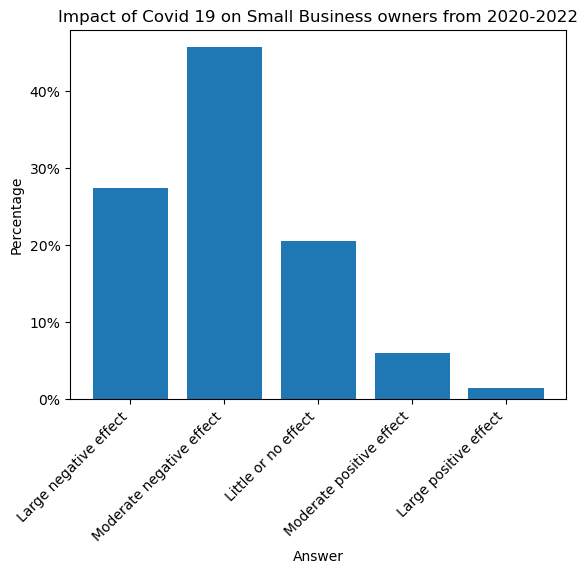

In [ ]:
df_filtered = df_pandemic[df_pandemic['instrument_id'] == 2].copy()


df_filtered['percentage'] = df_filtered['percentage'].str.rstrip('%').astype('float') / 100.0
# Extract required columns
averages = df_filtered.groupby('answer_id')['percentage'].mean()

fig, ax = plt.subplots()
ax.set_title("Impact of Covid 19 on Small Business owners from 2020-2022")
ax.bar(averages.index, averages.values)
ax.set_xticks(averages.index)
ax.set_xticklabels(['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect','Large positive effect'],rotation=45, ha='right')
ax.set_ylabel('Percentage')
ax.set_xlabel('Answer')

def percent(x, pos):
    return '{:.0%}'.format(x)

yticks = mtick.FuncFormatter(percent)
ax.yaxis.set_major_formatter(yticks)

print(averages)
plt.show()


Similarly, this pie chart illustrates the impact of COVID-19 on small business owners, categorized by the severity of the effect (from "Large negative effect" to "Large positive effect") in a different visual format.
This visualization serves to provide a proportional representation of the various impacts on small businesses, giving an intuitive understanding of the pandemic's widespread effects.

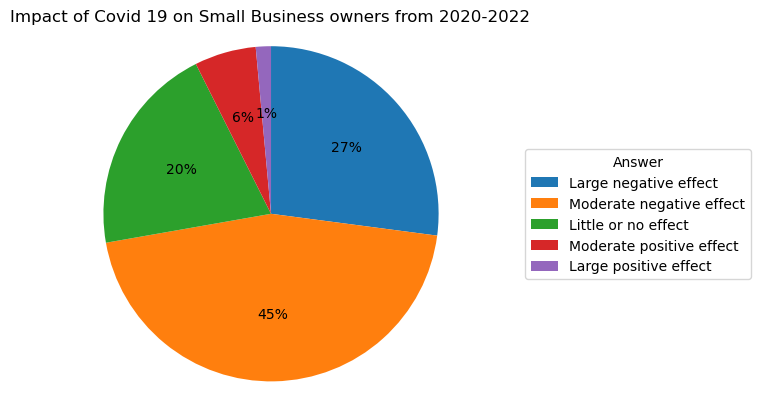

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Impact of Covid 19 on Small Business owners from 2020-2022")

# Plot the pie chart
wedges, texts, autotexts = ax.pie(averages.values, autopct='%.0f%%', startangle=90, counterclock=False)

# Create legend labels
legend_labels = ['Large negative effect', 'Moderate negative effect', 'Little or no effect', 'Moderate positive effect', 'Large positive effect']

# Set legend
ax.legend(wedges, legend_labels, title="Answer", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

plt.show()

## Visualization 2: Distribution of Jobs Reported by Business Age -- by Rohan Karle Sudarshan

This plot can depict, particularly how different business ages may correlate with employment levels during the pandemic period

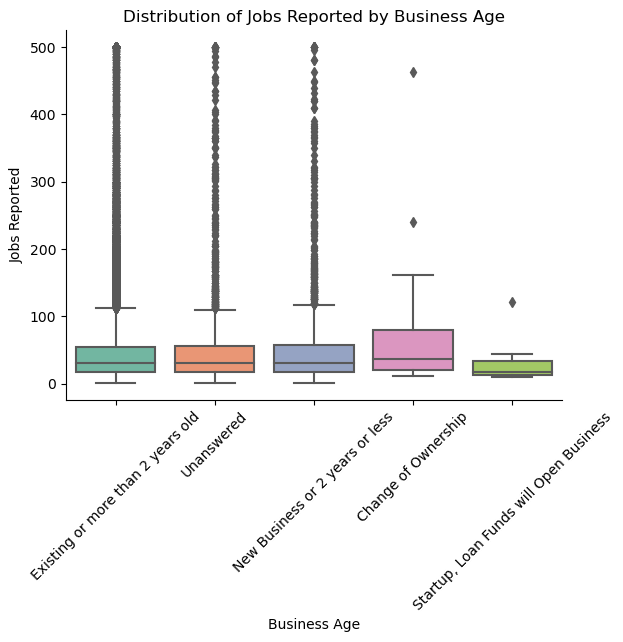

In [ ]:
sns.boxplot(data=df, x='BusinessAgeDescription', y='JobsReported', palette='Set2')
plt.title('Distribution of Jobs Reported by Business Age')
plt.xlabel('Business Age')
plt.ylabel('Jobs Reported')
plt.xticks(rotation=45)
sns.despine()
plt.show()

## Visualization 3: Loan Distribution Heat Map in Illinois -- by Revanth Varanasi

This heat map illustrates the distribution of loan approvals across Illinois counties, with darker red shades signifying higher loan amounts. It visually emphasizes regions with greater financial support, aiding in identifying investment opportunities and assessing economic activity. County names and borders are also depicted, offering geographic insights into the loan distribution pattern.


<Figure size 640x480 with 0 Axes>

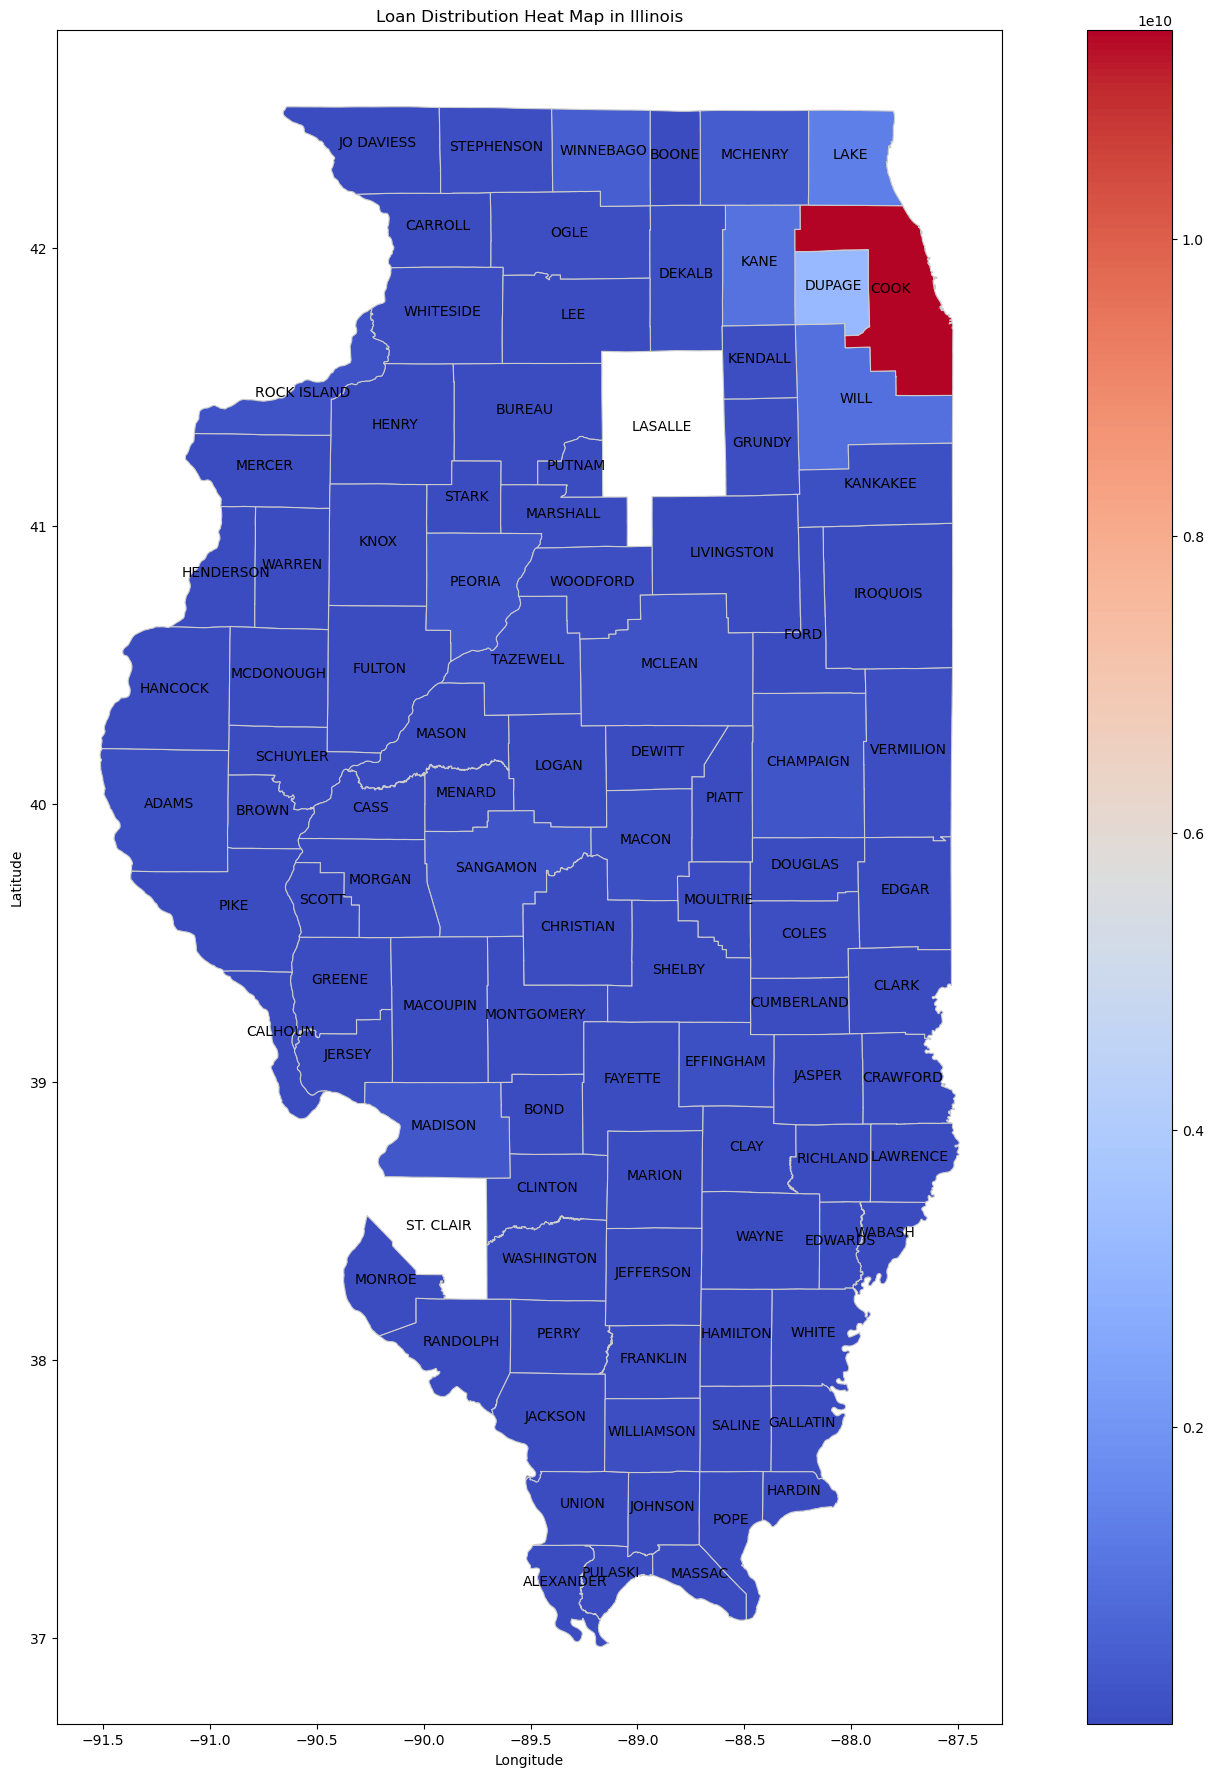

In [ ]:
import fiona
import geopandas as gpd
import matplotlib.pyplot as plt

# Set 'SHAPE_RESTORE_SHX' config option to 'YES'
fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'r'
fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'rw'

# Load the Illinois shapefile
illinois_map = gpd.read_file('IL_BNDY_County/IL_BNDY_County_Py.shp')

# Group by project county and calculate the sum of loan amounts
county_loan_sum = df_illinois.groupby('ProjectCountyName')['CurrentApprovalAmount'].sum().reset_index()

# Merge the loan sum data with the Illinois shapefile
illinois_map = illinois_map.merge(county_loan_sum, left_on='COUNTY_NAM', right_on='ProjectCountyName', how='left')

# Clear the previous plot
plt.clf()

# Create a figure and axis with larger size
fig, ax = plt.subplots(figsize=(22, 22))

# Plot the Illinois map with a heat map of loan distribution and county borders
illinois_map.plot(column='CurrentApprovalAmount', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plot county names
illinois_map.apply(lambda x: ax.annotate(text=x.COUNTY_NAM, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

# Set axis labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Loan Distribution Heat Map in Illinois')

# Show the plot
plt.show()



## Visualization 4: Exploring the Correlation between Loan and Forgiveness Amounts -- by Chandhu Bhumireddy

The scatter plot illustrates the correlation between loan and forgiveness amounts within a dataset, offering insights into their relationship, including linear or non-linear tendencies and outliers. Analyzing this plot aids in understanding the dynamics between loan sizes and forgiveness, highlighting trends and anomalies. This visualization is instrumental for data-driven decision-making, facilitating the evaluation of loan forgiveness trends and identifying atypical loans.

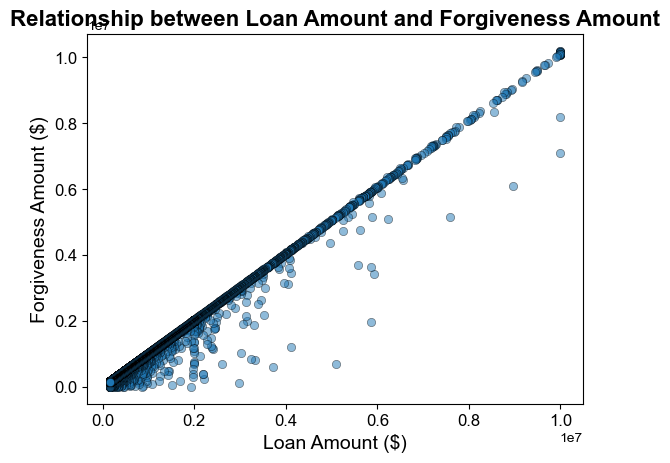

In [ ]:
# Create scatter plot
sns.scatterplot(data=df, x='CurrentApprovalAmount', y='ForgivenessAmount', alpha=0.5, edgecolor='black')

# Set title and axis labels
plt.title('Relationship between Loan Amount and Forgiveness Amount', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount ($)', fontsize=14)
plt.ylabel('Forgiveness Amount ($)', fontsize=14)

# Customize plot aesthetics
sns.set_style('whitegrid')  # Set seaborn style
plt.rcParams['figure.figsize'] = (10, 6)  # Set figure size
plt.xticks(fontsize=12)  # Set x-axis tick label font size
plt.yticks(fontsize=12)  # Set y-axis tick label font size

# Show the plot
plt.show()

## Visualization 5: Analyzing Loan amount and Loan status patterns -- by Gunashree Channakeshava

This histogram depicts the variance in loan amounts across a dataset, showcasing the frequency of various loan sizes. Such analysis uncovers trends, patterns, and potential outliers within the distribution, aiding in informed decision-making and offering a deeper understanding of the loan data's dynamics.

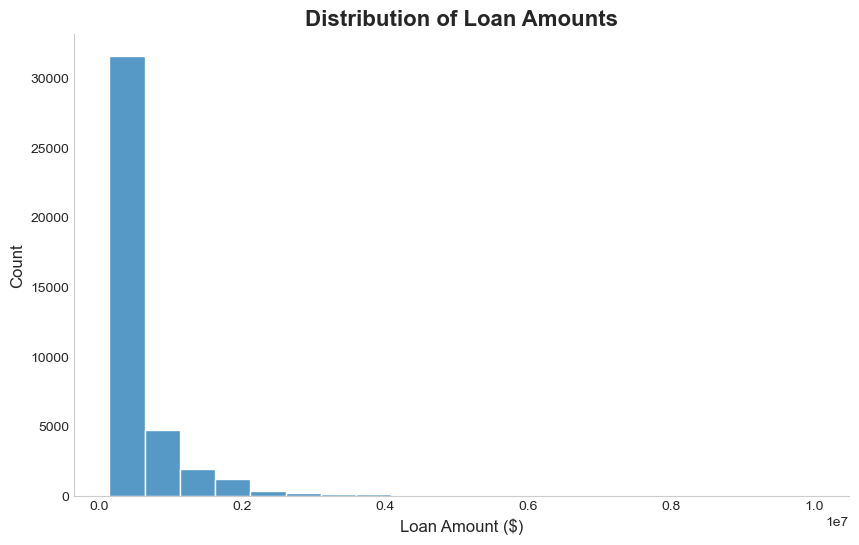

In [ ]:
# Create histogram plot
sns.histplot(data=df, x='CurrentApprovalAmount', bins=20)

# Set plot title, x-axis label, and y-axis label
plt.title('Distribution of Loan Amounts', fontsize=16, fontweight='bold')
plt.xlabel('Loan Amount ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Customize plot aesthetics
sns.set_style("whitegrid") # Set the background style to whitegrid
sns.despine() # Remove spines
plt.tick_params(axis='both', which='both', length=0) # Remove ticks
plt.grid(visible=False) # Hide grid lines

# Show plot
plt.show()

### Distribution of Loan Status

The below plot titled "Distribution of Loan Status" is a countplot that provides a visual representation of the frequency or count of different loan status categories in the dataset. It is useful for gaining insights into the loan portfolio, evaluating loan performance, monitoring changes over time, and communicating findings to stakeholders. The plot allows for quick identification of trends, imbalances, and risks related to loan status, making it a valuable tool for data analysis and decision-making in the context of loan data.

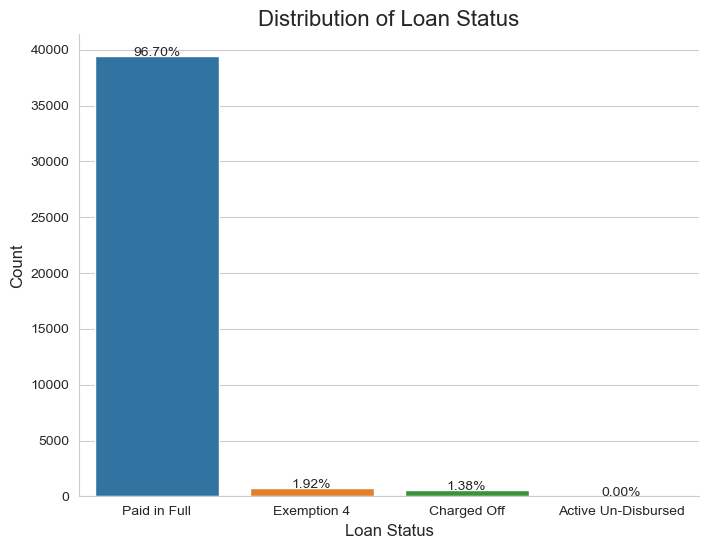

In [ ]:
# Set plot style
sns.set_style("whitegrid")

# Create countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='LoanStatus')
ax.set_title('Distribution of Loan Status', fontsize=16)
ax.set_xlabel('Loan Status', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Customize plot aesthetics
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add value labels to bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total:.2%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10)

plt.show()

## Visualization 6: Urban vs. Rural Distribution Analysis -- by Ishwa Tushar Shah

This pie chart illustrates the urban and rural categorizations within the dataset, offering a straightforward comparison of their proportions through a visually engaging pastel palette and a clear legend. This visualization aids in quickly grasping the balance between urban and rural indicators, facilitating an understanding of geographic distribution patterns essential for strategic planning and insight generation.


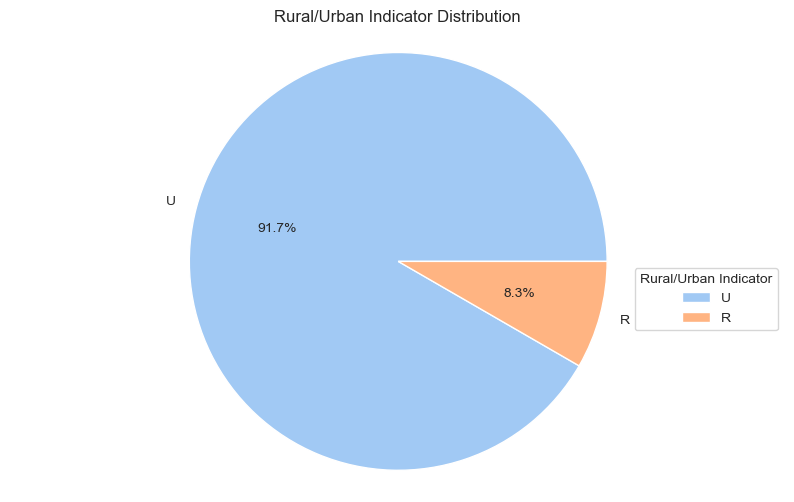

In [ ]:
# Create a pie chart for rural/urban indicator
rural_urban_counts = df['RuralUrbanIndicator'].value_counts()

# Set color palette
colors = sns.color_palette('pastel')

# Create pie chart with improved visual appearance
plt.pie(rural_urban_counts, labels=rural_urban_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Rural/Urban Indicator Distribution')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle

# Add legend
plt.legend(title='Rural/Urban Indicator', loc='best', bbox_to_anchor=(1, 0.5))

# Show plot
plt.show()

## Visualization 7: Average Loan Amounts Across Loan Statuses with Error Bars -- by Ishwa Tushar Shah


The plot elucidates the correlation between loan status and average loan amounts, augmented with error bars to highlight the range of variability. By delineating mean loan amounts by status and incorporating standard deviation, it reveals the financial dynamics associated with each loan status. The visualization's error bars underscore the spread and uncertainty of these averages, offering a nuanced view of financial variances across statuses. This analysis is pivotal for discerning financial trends and guiding decisions in loan management and policy formulation.

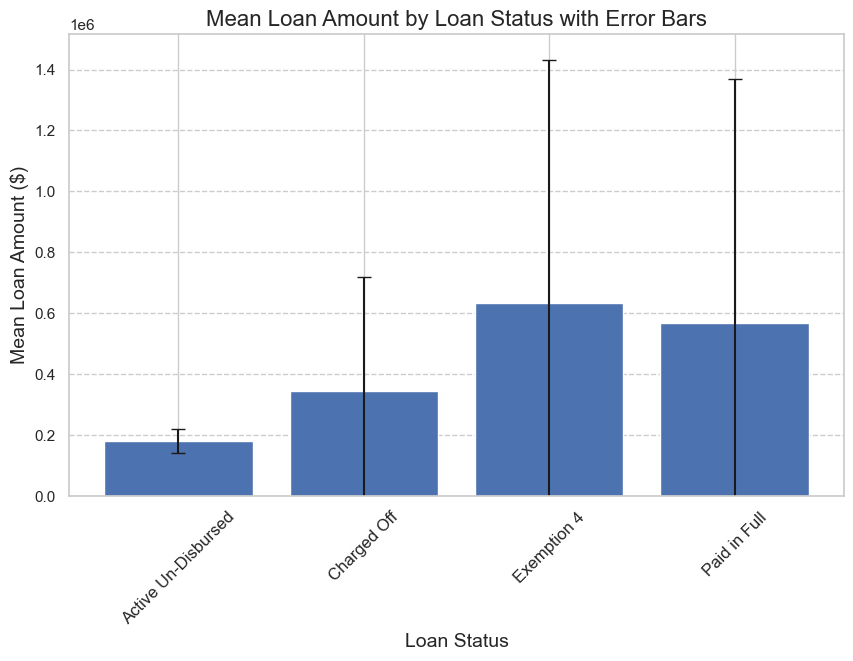

In [ ]:
# Calculate mean and standard deviation of loan amount by loan status
mean_loan_amount = df.groupby('LoanStatus')['CurrentApprovalAmount'].mean()
std_loan_amount = df.groupby('LoanStatus')['CurrentApprovalAmount'].std()

# Set Seaborn style
sns.set(style='whitegrid')

# Create bar plot with error bars
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(mean_loan_amount.index, mean_loan_amount.values, yerr=std_loan_amount.values, capsize=5)

# Set labels and title
plt.title('Mean Loan Amount by Loan Status with Error Bars', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Mean Loan Amount ($)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)  # Set x-axis label font size and rotation

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Show plot
plt.show()

## Visualization 8: Heatmap of Average Loan Amounts by Top 10 Counties and Business Age -- by Chandhu Bhumireddy

This heatmap depicts the average loan amounts across the top 10 counties, differentiated by business age categories. The color gradient from light to dark visually emphasizes the range in loan sizes, with lighter colors indicating higher loan values. Sparse cells indicate a concentration of loans in specific categories, highlighting disparities in loan distribution.

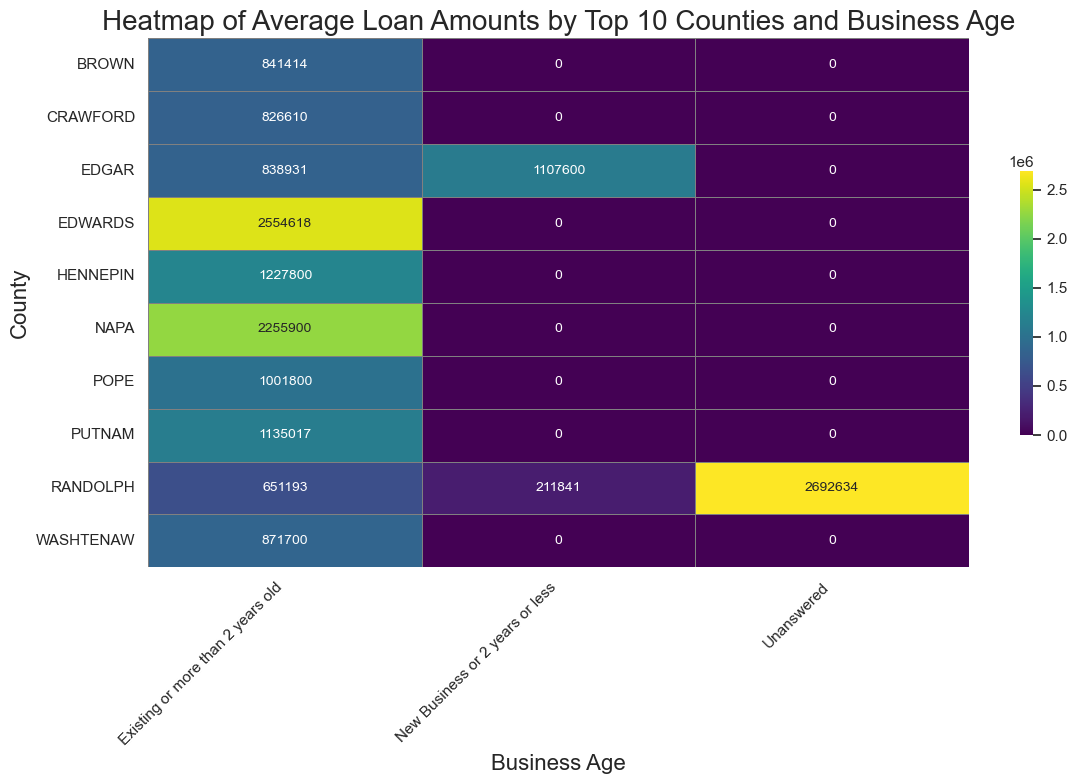

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df_hm = pd.read_csv('public_150k_plus_230331.csv')

# Calculate average loan amounts by county and sort to find the top 10
top_counties = df_hm.groupby('ProjectCountyName')['CurrentApprovalAmount'].mean().nlargest(10).index

# Filter the dataframe to include only the top 10 counties
df_hm_top = df_hm[df_hm['ProjectCountyName'].isin(top_counties)]

# Create a pivot table with just the top 10 counties
pivot_table_top = df_hm_top.pivot_table(values='CurrentApprovalAmount',
                                        index='ProjectCountyName',
                                        columns='BusinessAgeDescription',
                                        aggfunc='mean',
                                        fill_value=0)

# Increase the figure size to accommodate the smaller dataset
plt.figure(figsize=(12, 8))  # Adjust the size as needed for the smaller number of counties

# Define a threshold for annotations if needed (optional)
# threshold = pivot_table_top.max().max() * 0.05  # Example threshold at 5% of the max value

# Create a heatmap with annotations for all values
sns.heatmap(pivot_table_top, annot=True, fmt=".0f", cmap='viridis',
            annot_kws={"size": 10},  # Adjust font size of annotations as needed
            cbar_kws={'shrink': 0.5},  # Shrink color bar to fit
            linewidths=.5,  # Add lines between cells
            linecolor='gray'  # Lines color
            # ,mask=(pivot_table_top < threshold)  # Hide annotations below threshold if threshold is used
           )

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set title and axis labels
plt.title('Heatmap of Average Loan Amounts by Top 10 Counties and Business Age', fontsize=20)
plt.xlabel('Business Age', fontsize=16)
plt.ylabel('County', fontsize=16)

plt.tight_layout()  # Adjust layout to fit
plt.show()


From the above Heatmap we can infer which counties and business age groups received more financial support during the pandemic

## Visualization 9: Trend Analysis of Loan Approvals with Rolling Statistics — by Revanth Varanasi

This line chart presents the weekly sum of PPP loan approvals with enhanced trend analysis using a 4-week rolling average and a surrounding confidence interval. The crimson color line represents the weekly total of approved loan amounts, capturing the immediate fluctuations in the data.


The Blue Line depicts 4-week rolling average which smooths out the weekly ups and downs, providing a clearer view of whether loan approvals were generally increasing, decreasing, or remaining stable over time. The rolling standard deviation helps in understanding the variability in the weekly totals, which informs the confidence interval.



In [ ]:
# Format the axis to Billions
def billions_formatter(x, pos):
    return f'${int(x/1e9)}B'
#

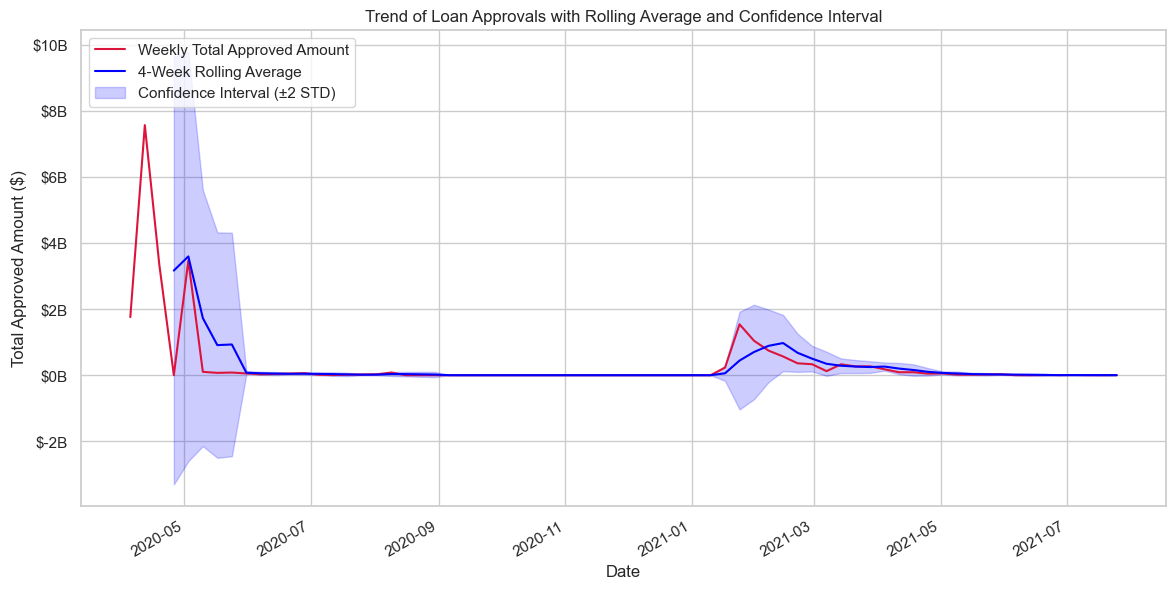

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.ticker as mtick

df_ts = pd.read_csv('public_150k_plus_230331.csv')

# Making sure dateApproved is of datetime datatype
df_ts['DateApproved'] = pd.to_datetime(df_ts['DateApproved'])

# Sort by the date for plotting
df_ts.sort_values('DateApproved', inplace=True)

# Create a new DataFrame to store aggregated data
time_series = df_ts.set_index('DateApproved').resample('W').sum()

# Calculate rolling average and standard deviation
time_series['RollingMean'] = time_series['CurrentApprovalAmount'].rolling(window=4).mean()
time_series['RollingSTD'] = time_series['CurrentApprovalAmount'].rolling(window=4).std()

# Plot the data
plt.figure(figsize=(14, 7))

# Plot the original data
plt.plot(time_series.index, time_series['CurrentApprovalAmount'], label='Weekly Total Approved Amount', color='crimson')

# Plot the rolling mean
plt.plot(time_series.index, time_series['RollingMean'], label='4-Week Rolling Average', color='blue')

# Plot the confidence intervals
plt.fill_between(time_series.index,
                 time_series['RollingMean'] - 2 * time_series['RollingSTD'],
                 time_series['RollingMean'] + 2 * time_series['RollingSTD'],
                 color='blue', alpha=0.2, label='Confidence Interval (±2 STD)')

# Formatting the plot
plt.title('Trend of Loan Approvals with Rolling Average and Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Total Approved Amount ($)')
plt.legend(loc='upper left')
plt.grid(True)

# Set date format on x-axis
date_form = DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(date_form)
plt.gcf().autofmt_xdate() # Rotation

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(billions_formatter))

plt.show()


The graph displays a significant peak in PPP loan approvals in May 2020, likely due to the initial response to the COVID-19 pandemic's economic impact. Following this peak, there was a notable decrease in weekly loan approvals, potentially due to the initial demand being satisfied or changes in fund availability. As the months progressed into 2021, the loan approval amounts leveled off, indicating a stabilization in the number of loans being issued. This pattern suggests that businesses might not have been seeking as many loans, possibly because they had already received the necessary assistance. Overall, the trend from a surge to a decline and then to a steady state captures the changing landscape of loan approvals during the pandemic.

## Visualization 10: Parallel Coordinates Plot for Loan amounts and Jobs reported -- by Revanth Varanasi

This Parallel Coordinates Plot provides a visual exploration of the relationships between normalized loan amounts, jobs reported, and the status of the loans in our dataset. Here are key observations and their implications:

- **Axes Overview**: The plot includes three axes—normalized loan amount, normalized jobs reported, and loan status. Each line represents an individual loan, with the position on each axis indicating the value of that feature for the loan.

- **Color Coding**: The colors represent different loan statuses:
  - **Pink**: Loans that are Paid in Full
  - **Green**: Loans that are Charged Off
  - **Yellow**: Loans under Exemption 4

- **Data Insights**:
  - **Loan Amount and Job Reporting**: There is a visible trend where loans with higher amounts and more jobs reported tend to be fully paid off, as indicated by the density of pink lines towards higher values on both the loan amount and jobs reported axes.
  - **Risk Indicators**: Loans with lower amounts and fewer jobs reported show a diverse range of outcomes but include a significant presence of green lines, indicating a higher likelihood of being charged off.

This visualization is instrumental in identifying patterns and potential risk factors associated with different loan characteristics, which can aid in strategic decision-making and risk management.


In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset
df_mv = pd.read_csv('public_150k_plus_230331.csv')

# Normalize the 'CurrentApprovalAmount' and 'JobsReported' columns
max_approval = df_mv['CurrentApprovalAmount'].max()
min_approval = df_mv['CurrentApprovalAmount'].min()
df_mv['NormalizedCurrentApprovalAmount'] = (df_mv['CurrentApprovalAmount'] - min_approval) / (max_approval - min_approval)

max_jobs = df_mv['JobsReported'].max()
min_jobs = df_mv['JobsReported'].min()
df_mv['NormalizedJobsReported'] = (df_mv['JobsReported'] - min_jobs) / (max_jobs - min_jobs)

# Convert 'LoanStatus' to a categorical type and get the codes
df_mv['LoanStatusCode'] = pd.Categorical(df_mv['LoanStatus']).codes

# You might want to filter out loans with status 'Unanswered' or other uninformative statuses
df_filtered = df_mv[df_mv['LoanStatus'] != 'Unanswered']

# Sample data to prevent overplotting
df_sampled = df_filtered.sample(n=500, random_state=42)

# Define a mapping from loan status codes to more understandable categories
loan_status_mapping = df_sampled[['LoanStatusCode', 'LoanStatus']].drop_duplicates().sort_values('LoanStatusCode')
status_mapping = loan_status_mapping.set_index('LoanStatusCode').to_dict()['LoanStatus']

# Plot using the sampled data
fig = px.parallel_coordinates(df_sampled,
                              dimensions=['NormalizedCurrentApprovalAmount', 'NormalizedJobsReported', 'LoanStatusCode'],
                              color='LoanStatusCode',
                              labels={
                                  'NormalizedCurrentApprovalAmount': 'Loan Amount (Normalized)',
                                  'NormalizedJobsReported': 'Jobs Reported (Normalized)',
                                  'LoanStatusCode': 'Loan Status'
                              },
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)

# Update layout to add original loan status labels
fig.update_layout(
    coloraxis_colorbar=dict(
        title='Loan Status',
        tickvals=list(status_mapping.keys()),
        ticktext=list(status_mapping.values())
    )
)

fig.show()

## Visualization 11: Distribution of Jobs Reported by Borrowers — by Rashmika Nattam

This histogram displays the distribution of the number of jobs reported by borrowers who received loans under the Paycheck Protection Program (PPP). Each bar represents a range of reported job numbers, and the height of each bar indicates the frequency of borrowers falling within that range.


The kernel density estimation (KDE) curve provides a smooth estimate of the underlying distribution of job numbers. This visualization helps us understand the distribution of employment impact among PPP borrowers, providing insights into the job situation during the COVID-19 pandemic.


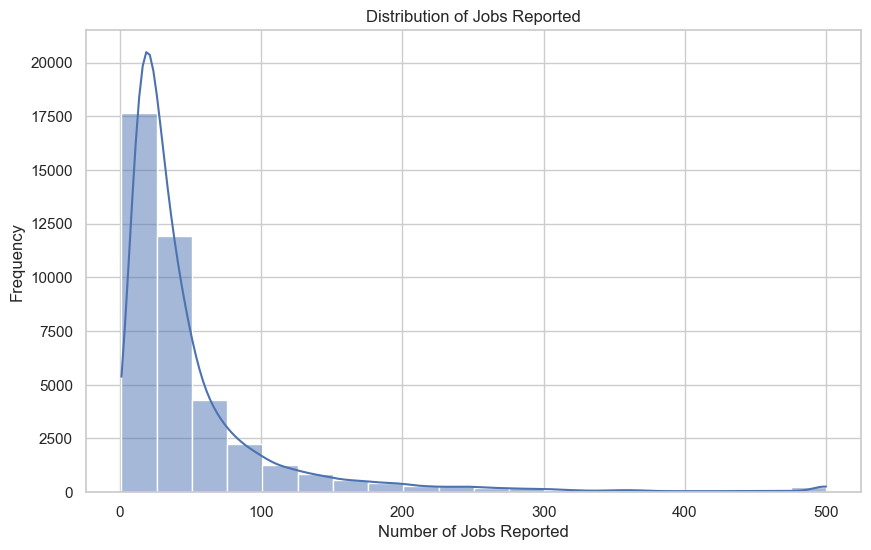

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('public_150k_plus_230331.csv')

# Plotting the distribution of jobs reported by different industries
plt.figure(figsize=(10, 6))

# Create a histogram plot
sns.histplot(data=df, x='JobsReported', bins=20, kde=True)

# Set the title, label for the x-axis and label for the y-axis of the plot
plt.title('Distribution of Jobs Reported')
plt.xlabel('Number of Jobs Reported')
plt.ylabel('Frequency')

# Display the plot
plt.show()

## Visualization 12: Loan Purpose Analysis by Business Type — by Rashmika Nattam

This countplot depicts the distribution of loans across various business types, providing insights into the industries or sectors that are most frequently benefiting from the loans. The vertical bar chart displays each business type along the y-axis, with the count of loans represented by the length of the bars. The order of the business types is arranged based on their frequency, with the most common types positioned at the top.

This visualization enables easy comparison of loan distribution across different business types, highlighting which sectors are the most prominent recipients of loans. It can aid in identifying trends or patterns in loan allocation and inform decision-making processes related to resource allocation or investment strategies.


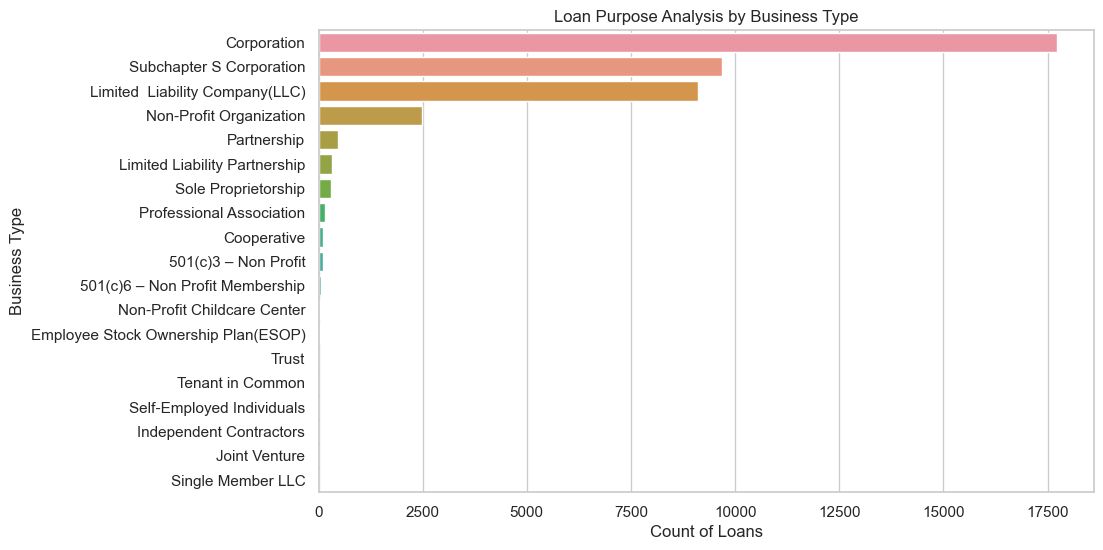

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('public_150k_plus_230331.csv')

# Plotting the distribution of jobs reported by different industries
plt.figure(figsize=(10, 6))

# Create a count plot
sns.countplot(y='BusinessType', data=df, order=df['BusinessType'].value_counts().index)

# Set the title, label for the x-axis and label for the y-axis of the plot
plt.title('Loan Purpose Analysis by Business Type')
plt.xlabel('Count of Loans')
plt.ylabel('Business Type')

# Display the plot
plt.show()

## Visualization 13: Loan Approval Status by Veteran Status — by Rohan Karle Sudarshan

This visualization is a count plot showing the distribution of loan approval status based on veteran status. The plot allows us to compare the loan approval status distribution between veterans and non-veterans.  

Each bar on the plot is segmented into different colors representing the count of loans approved and not approved for a specific veteran status. By comparing the heights of these segments within each veteran status category, we gain insights into the proportion of approved and not approved loans for both veterans and non-veterans.

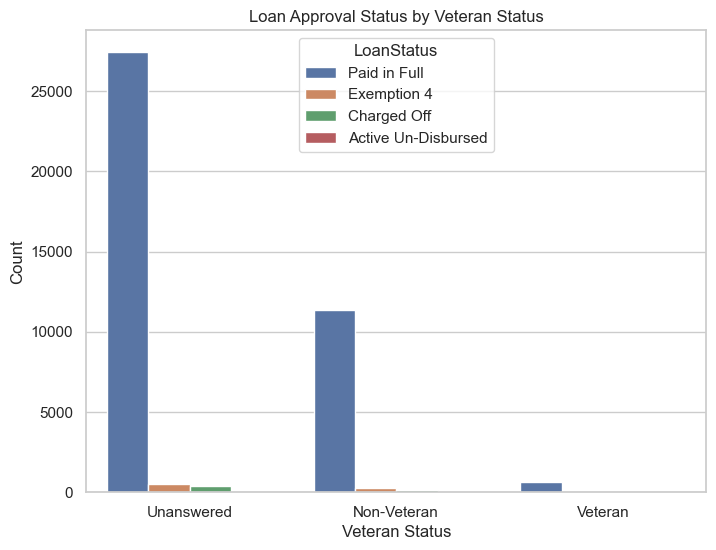

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('public_150k_plus_230331.csv')

# Plotting the distribution of jobs reported by different industries
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x='Veteran', hue='LoanStatus', data=df)

# Set the title, label for the x-axis and label for the y-axis of the plot
plt.title('Loan Approval Status by Veteran Status')
plt.xlabel('Veteran Status')
plt.ylabel('Count')

# Display the plot
plt.show()

## Visualization 14: Loan Amount by Borrower Gender — by Rohan Karle Sudarshan

The box plot shows that the distribution of loan amounts is similar for male and female borrowers. The median loan amount appears to be around $10,000 for both genders. There is however a larger spread in loan amounts for male borrowers compared to female borrowers. These observations provide valuable insights into how loan amounts vary between male and female borrowers, highlighting potential differences in borrowing behaviors or access to financial resources between the two groups.

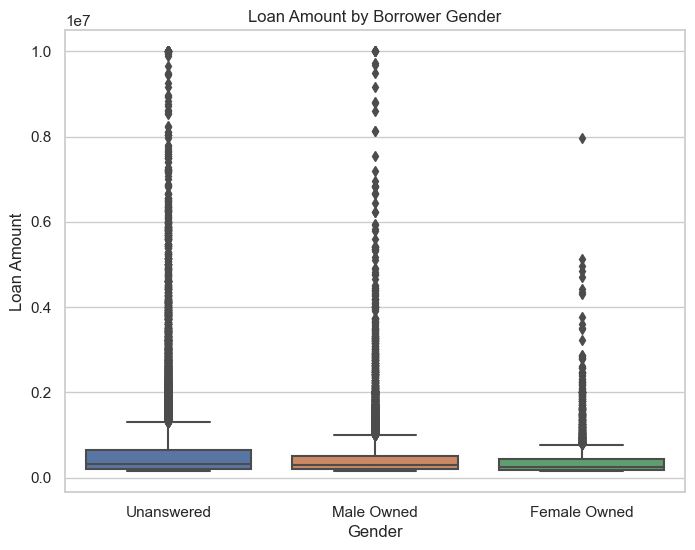

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('public_150k_plus_230331.csv')

# Plotting the distribution of jobs reported by different industries
plt.figure(figsize=(8, 6))

# Create a count plot
sns.boxplot(x='Gender', y='CurrentApprovalAmount', data=df)

# Set the title, label for the x-axis and label for the y-axis of the plot
plt.title('Loan Amount by Borrower Gender')
plt.xlabel('Gender')
plt.ylabel('Loan Amount')

# Display the plot
plt.show()

## Visualization 15: Loan Approval Status by Ethnicity — by Chandhu Bhumireddy

This visualization is a countplot that illustrates the number of loan applications submitted by ethnicity, categorized by loan status. The legend identifies the colors representing various loan statuses such as "Paid in Full," "Charged Off," "Active Un-Disbursed," "Exemption 4," "Not Hispanic or Latino," and "Hispanic or Latino" loan statuses.

By comparing the heights of colored bars within each ethnicity category, you can discern the distribution of loans across different loan status categories (e.g., approved, denied, pending). For instance, it appears that a higher number of "Not Hispanic or Latino" loans were "Paid in Full" compared to "Hispanic or Latino" loans.
Overall, this countplot can be a useful tool to explore possible relationships between loan approval rates and ethnicity.

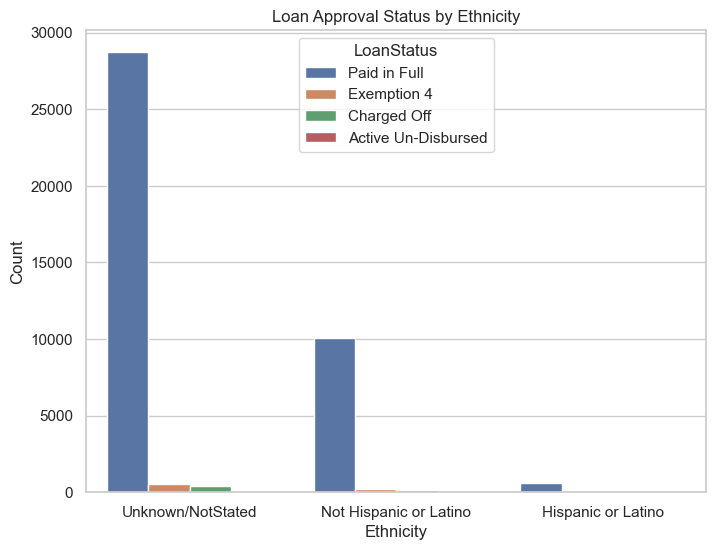

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('public_150k_plus_230331.csv')

# Plotting the distribution of jobs reported by different industries
plt.figure(figsize=(8, 6))

# Create a count plot
sns.countplot(x='Ethnicity', hue='LoanStatus', data=df)

# Set the title, label for the x-axis and label for the y-axis of the plot
plt.title('Loan Approval Status by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

# Display the plot
plt.show()

## Visualization 16: Loan Approval Status by Gender — by Gunashree Channakeshava
This visualization employs pie charts to showcase the distribution of loan applications submitted by gender, segmented by loan status. The legend provides clarity on the colors corresponding to different loan statuses such as "Paid in Full," "Charged Off," "Active Un-Disbursed," "Exemption 4," "Male Owned," "Female Owned," and "Unanswered."

Analyzing the area of colored segments within each gender category allows for a clear understanding of the distribution of loans across various status categories (e.g., approved, denied, pending). Notably, it indicates a higher number of loans "Paid in Full" in comparison to those "Charged Off" for both genders.

In essence, this pie chart serves as an effective tool to explore potential correlations between loan approval rates and gender, offering insights into the patterns of loan status distribution among different demographic groups.

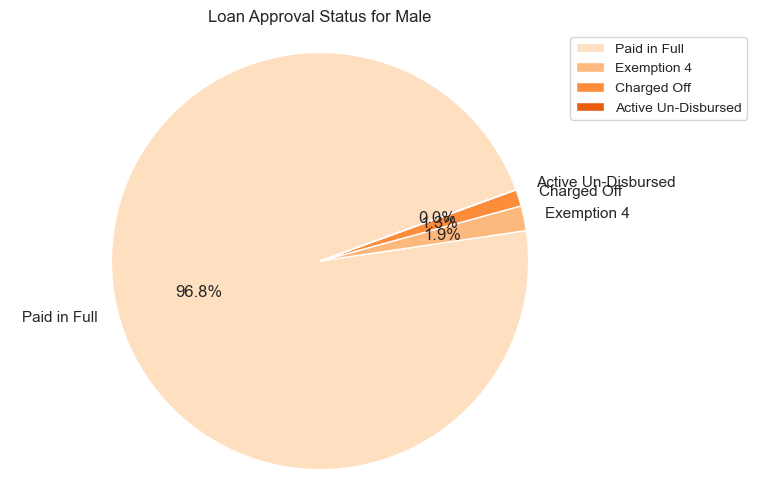

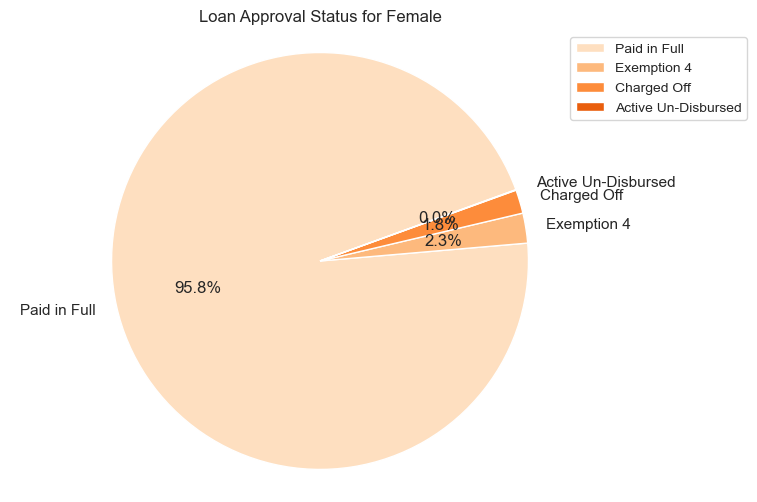

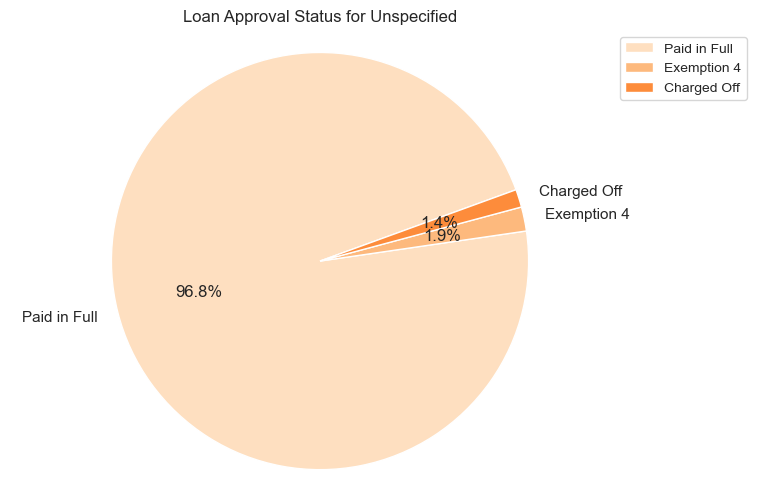

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('public_150k_plus_230331.csv')

# Filter data for each gender
male_data = df[df['Gender'] == 'Male Owned']
female_data = df[df['Gender'] == 'Female Owned']
unspecified_data = df[df['Gender'] == 'Unanswered']

# Define color palette with shades of orange
colors = sns.color_palette('Oranges', n_colors=5)

# Function to plot pie chart for loan approval status
def plot_loan_status_pie(data, gender):
    loan_status_counts = data['LoanStatus'].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=20, colors=colors)
    plt.title(f'Loan Approval Status for {gender}', fontsize=12)
    plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.2, 1))
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Plot pie chart for Male
plot_loan_status_pie(male_data, 'Male')

# Plot pie chart for Female
plot_loan_status_pie(female_data, 'Female')

# Plot pie chart for Unspecified
plot_loan_status_pie(unspecified_data, 'Unspecified')


## Visualization 17: Jobs reported by Business type -- by Gunashree Channakeshava
This line chart illustrates the distribution of job numbers across different business types, offering insights into the range of reported job counts within various industries or sectors.

Each point on the chart represents a specific business type along the y-axis, while the count of reported job numbers is depicted along the x-axis. The arrangement of business types is ordered based on their frequency, with the most common types positioned at the top of the chart.

By examining the points on the chart, viewers can discern the distribution of job counts across different business categories, identifying which industries or sectors have the highest and lowest reported job numbers. This visualization provides a clear overview of the employment landscape across various business types, facilitating comparisons and analysis of job distribution trends.

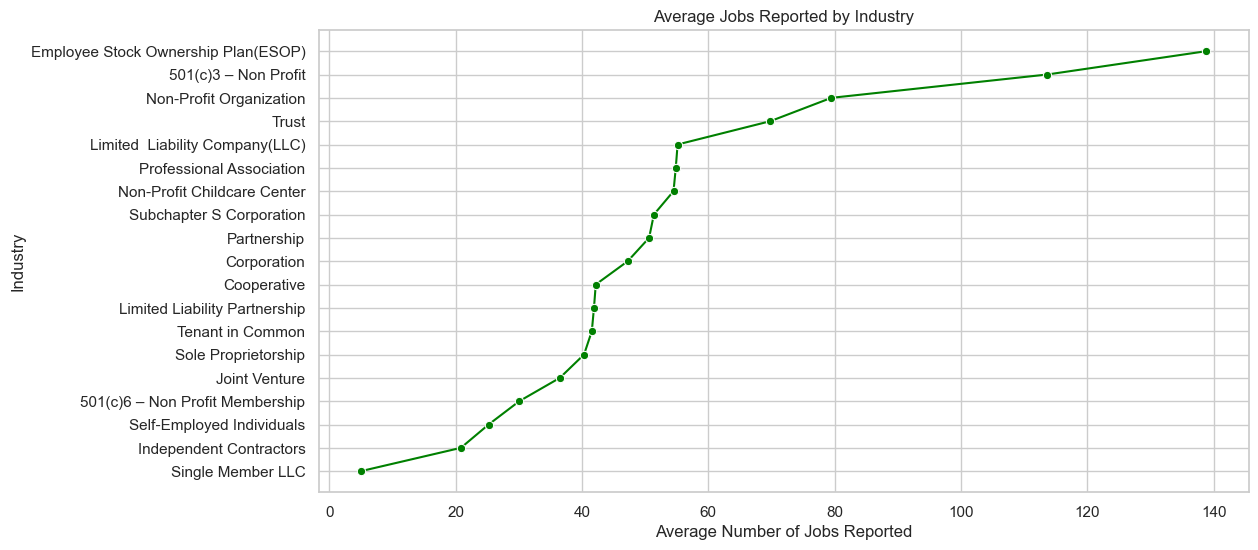

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('public_150k_plus_230331.csv')

# Aggregate the data by BusinessType and calculate the mean of JobsReported
jobs_by_industry = df.groupby('BusinessType')['JobsReported'].mean().sort_values(ascending=False)

# Plotting the distribution of jobs reported by different industries as a line chart
plt.figure(figsize=(12, 6))

# Create a line plot
sns.lineplot(x=jobs_by_industry, y=jobs_by_industry.index, marker='o', color = 'green')

# Set the title, label for the x-axis and label for the y-axis of the plot
plt.title('Average Jobs Reported by Industry')
plt.xlabel('Average Number of Jobs Reported')
plt.ylabel('Industry')

# Display the plot
plt.show()


## Visualization 18: Loan Approval Status by City — by Ishwa Tushar Shah
This visualization involves another countplot to showcase the distribution of loan applications based on the top 10 borrowing business city, with Loan Status segments per city. The legend provides clarity on the colors corresponding to different loan statuses such as "Paid in Full", "Charged Off", "Exemption 4".

Analyzing the area of colored segments for each of the status cases shows the stark difference between the amount of Chicago businesses requesting a loan as compared to the other cities and also the difference between the Charged Off and Exemption 4 loans are a very small number in the rest of the Illinois cities, however, the same number is quite substantial for Chicago.

Overall, while the graph provides significant starting insights regarding the top cities from where loans have been requested, we have further plotted the top 5 cities for each category to get a clearer idea.

In [122]:
df_city = pd.read_csv('public_150k_plus_230331.csv')

# Convert BorrowerCity values to lowercase and strip initial and end spaces
df_city['BorrowerCity'] = df_city['BorrowerCity'].str.lower().str.strip()

# Get the top 10 most occurring BorrowerCity values
top_cities = df_city['BorrowerCity'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 cities
df_top_cities = df_city[df_city['BorrowerCity'].isin(top_cities)]

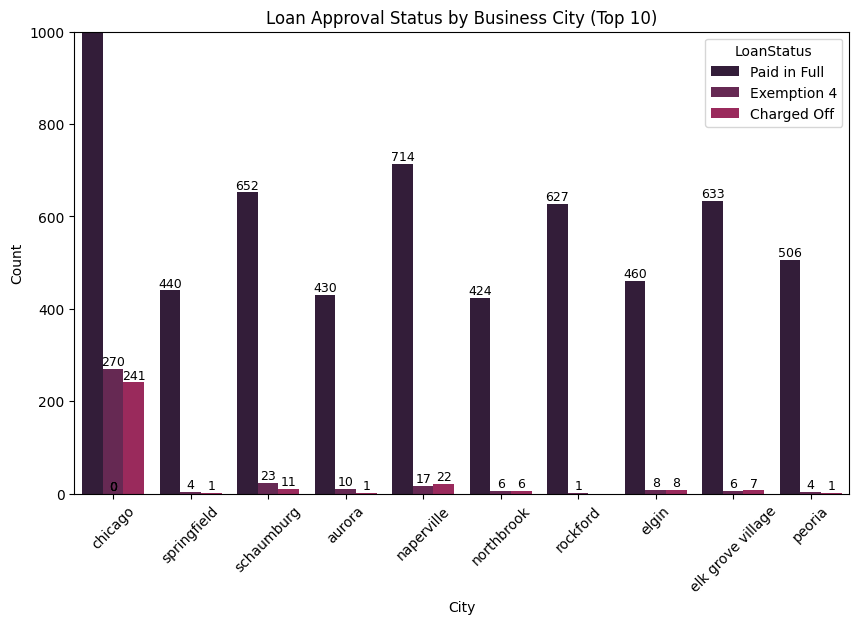

In [123]:
plt.figure(figsize=(10, 6))
sns.set_palette('rocket')

# Create the countplot
ax = sns.countplot(x='BorrowerCity', hue='LoanStatus', data=df_top_cities)

# Set the title, label for the x-axis and label for the y-axis of the plot
plt.title('Loan Approval Status by Business City (Top 10)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1000)

# Add count labels above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()


In [124]:
len(df_top_cities[(df_top_cities['BorrowerCity'] == 'chicago') & (df_top_cities['LoanStatus'] == 'Paid in Full')])

9147

<Figure size 1200x600 with 0 Axes>

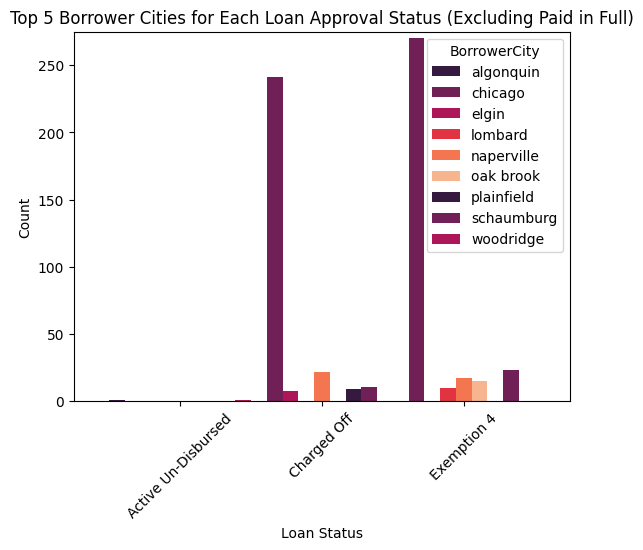

In [133]:
top_cities_by_loan_status = df_city.groupby('LoanStatus')['BorrowerCity'].value_counts().groupby(level=0).nlargest(5).reset_index(level=0, drop=True)

top_cities_by_loan_status_df = top_cities_by_loan_status.reset_index()

filtered_df = top_cities_by_loan_status_df[top_cities_by_loan_status_df['LoanStatus'] != 'Paid in Full']

# Pivot the filtered DataFrame so that each unique 'BorrowerCity' becomes a separate column
pivot_df = filtered_df.pivot(index='LoanStatus', columns='BorrowerCity', values='count')

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', width=1)

# Set the title and labels
plt.title('Top 5 Borrower Cities for Each Loan Approval Status (Excluding Paid in Full)')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.ylim(0, 275)
# Display the plot
plt.show()

In [126]:
top_cities_by_loan_status_df

LoanStatus       BorrowerCity  count
0   Active Un-Disbursed          woodridge      1
1   Active Un-Disbursed          algonquin      1
2           Charged Off            chicago    241
3           Charged Off         naperville     22
4           Charged Off         schaumburg     11
5           Charged Off         plainfield      9
6           Charged Off              elgin      8
7           Exemption 4            chicago    270
8           Exemption 4         schaumburg     23
9           Exemption 4         naperville     17
10          Exemption 4          oak brook     15
11          Exemption 4            lombard     10
12         Paid in Full            chicago   9147
13         Paid in Full         naperville    714
14         Paid in Full         schaumburg    652
15         Paid in Full  elk grove village    633
16         Paid in Full           rockford    627

## Visualization 19: Pairplot Analysis of Loan Data -- by Rashmika Nattam

This pairplot has four variables: JobsReported, CurrentApprovalAmount, SBA Guaranty Percentage, and Term. Each point on the pairplot represents a loan. The x-axis represents one variable and the y-axis represents another variable. By plotting these points, we can see if there is a relationship between the two variables.

We observe that there is a positive correlation between JobsReported and CurrentApprovalAmount. This means that loans with a higher number of jobs reported tend to have higher approval amounts.

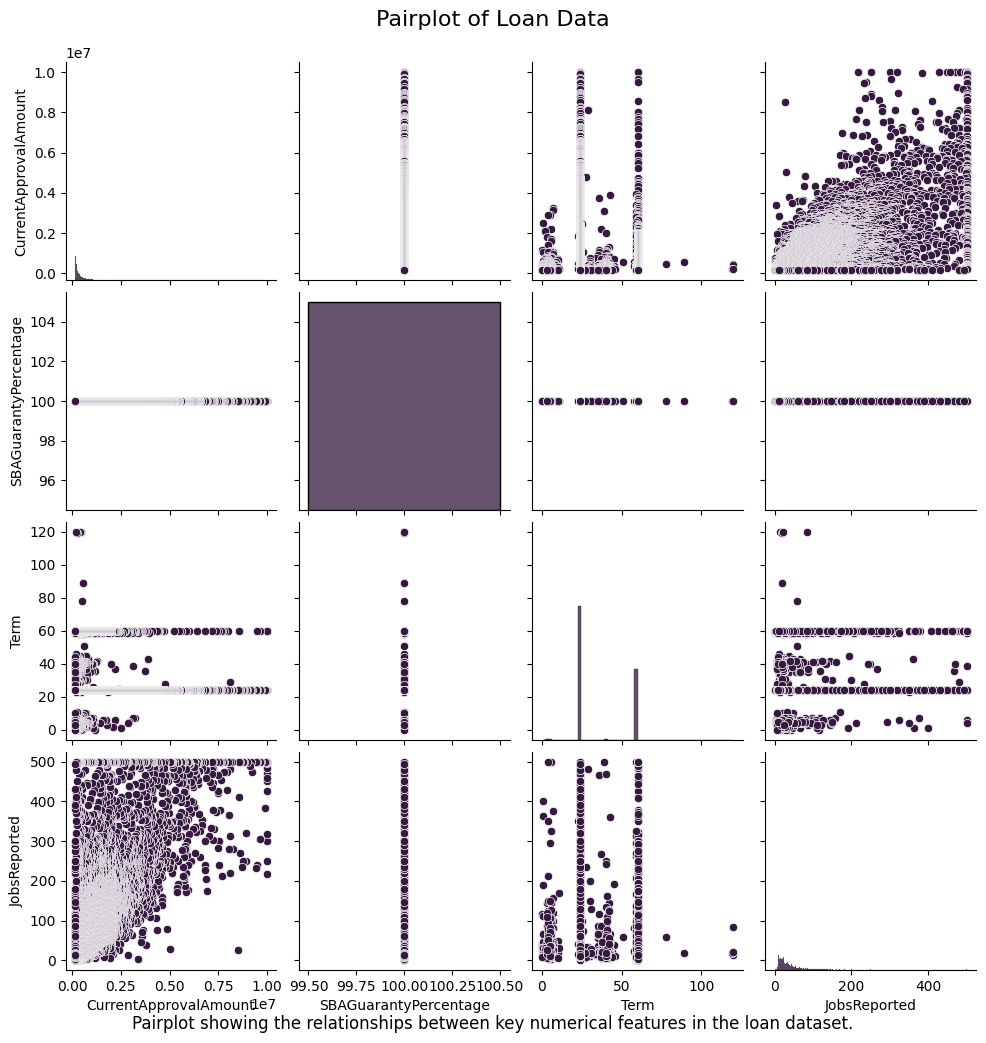

In [ ]:
df = pd.read_csv('public_150k_plus_230331.csv')

# Create the pairplot
pairplot = sns.pairplot(df[['CurrentApprovalAmount', 'SBAGuarantyPercentage', 'Term', 'JobsReported']])

# Set title and description
pairplot.fig.suptitle('Pairplot of Loan Data', fontsize=16, y=1.02)
pairplot.fig.text(0.5, 0.001, 'Pairplot showing the relationships between key numerical features in the loan dataset.', ha='center', fontsize=12)

# Display the pairplot
plt.show()

# Machine Learning Analysis



### Model 1: Predicting Survey Estimate Percentages

**Responsible Member(s):** Rashmika Nattam

#### Overview
This analysis utilizes a **Gradient Boosting Regressor** to predict the 'ESTIMATE_PERCENTAGE' feature within a survey dataset. Our aim is to gauge the COVID-19 pandemic's impact on small businesses, based on their perceptions reflected in the survey responses. The model's preparatory phase involves label-encoding categorical features and splitting the dataset into training and test subsets for comprehensive evaluation.

#### Methodology
- **Data Preprocessing**: Label-encoding of categorical variables and splitting into training and test datasets.
- **Model**: Gradient Boosting Regressor.
- **Evaluation Metric**: Mean Squared Error (MSE).

#### Baseline Comparison
- **Baseline Model**: Utilizes a simple mean predictor to establish a benchmark MSE.
- **Comparison**: The Gradient Boosting Regressor is evaluated against this baseline to highlight its capability in deciphering complex data patterns, which a simple averaging method cannot achieve.

#### Results and Interpretation
After applying the Gradient Boosting Regressor model, we obtained a **Mean Squared Error (MSE) of 0.022558408073617114**, signifying a notable improvement in predictive accuracy over the baseline model. This enhancement illustrates the model's efficacy in capturing the nuanced relationships between survey data features and the estimate percentages.

This precise MSE value highlights the effectiveness of the Gradient Boosting model in accurately modeling the survey responses related to the pandemic's impact on small businesses. It suggests that specific, identifiable factors have a significant influence on businesses' perceptions, which can be pivotal in guiding policy-making and targeted support allocation.

**Conclusion**: The advanced performance of the Gradient Boosting model, as demonstrated by the achieved MSE, confirms its value in predicting the survey estimate percentages more accurately than the baseline approach. This analysis sheds light on critical factors that influence small businesses' perceptions of the pandemic's impact, offering actionable insights for strategic decision-making and support planning.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

df1 = pd.read_csv('National_Sate_Illinois_data.csv')
# Preprocessing
df1['ESTIMATE_PERCENTAGE'] = df1['ESTIMATE_PERCENTAGE'].str.rstrip('%').astype('float') / 100.0
df1['SE'] = df1['SE'].str.rstrip('%').astype('float') / 100.0

# Encoding categorical variables
le = LabelEncoder()
df1['ST'] = le.fit_transform(df1['ST'])
df1['QUESTION'] = le.fit_transform(df1['QUESTION'])
df1['ANSWER_TEXT'] = le.fit_transform(df1['ANSWER_TEXT'])

# Define features and target
X = df1.drop('ESTIMATE_PERCENTAGE', axis=1)
y = df1['ESTIMATE_PERCENTAGE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

print(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

train_error = mean_squared_error(y_train, model.predict(X_train))

[0.09200621 0.2302423  0.46534511 ... 0.24202128 0.43298962 0.21264352]
Mean Squared Error: 0.022558408073617114


### Feature Importance Plot
This plot visualizes the importance of each feature in the model. This will help identify which features have the most significant impact on the predicted output. We can use the feature_importances_ attribute of the trained model.

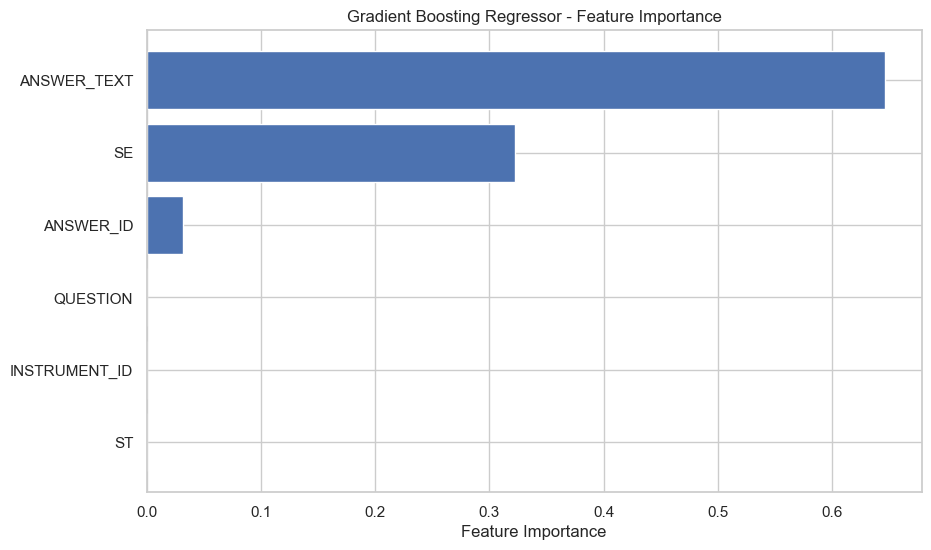

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importances from the trained model
feature_importance = model.feature_importances_

# Sort feature indices based on their importance scores
sorted_idx = np.argsort(feature_importance)

# Get feature names based on sorted indices
features = X.columns[sorted_idx]

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')

# Set y-axis ticks and labels to feature names
plt.yticks(range(len(sorted_idx)), features)

# Set labels for x-axis and title of the plot
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Regressor - Feature Importance')

# Show the plot
plt.show()

### Residual Plot
By plotting the residuals (the differences between actual and predicted values) against the predicted values, we are able to check if the model is making systematic errors.

The residual plot is crucial as it validates regression model assumptions, ensuring errors are randomly distributed around zero. By visualizing residuals against predicted values, it helps detect patterns like heteroscedasticity and outliers, guiding model refinement for enhanced predictive accuracy.

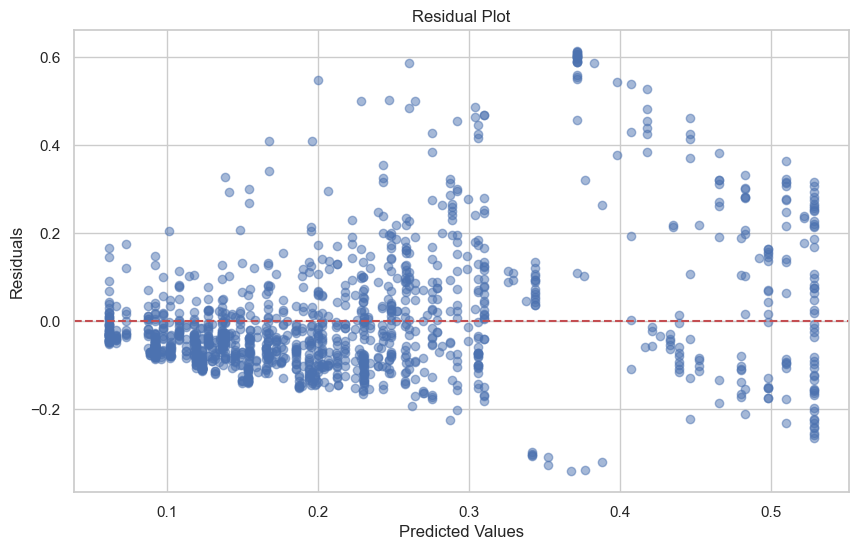

In [ ]:
# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Create a scatter plot of predicted values against residuals
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)

# Set title, x-axis and y-axis label
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# Add a horizontal line at y=0 to indicate where residuals equal zero
plt.axhline(y=0, color='r', linestyle='--')

# Show the plot
plt.show()

#### Prediction using Random Forest Regressor (Ishwa Tushar Shah)

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error (Random Forest): {mse_rf}')
train_error_rf = mean_squared_error(y_train, rf_model.predict(X_train))

Mean Squared Error (Random Forest): 0.0019825621098127195


#### Prediction using Support Vector Machine with Polynomial Kernel (Ishwa Tushar Shah)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
svr_model = SVR(kernel='poly')

# Fit the model
svr_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
print(f'Mean Squared Error (SVR): {mse_svr}')
train_error_svr = mean_squared_error(y_train, svr_model.predict(X_train_scaled))

Mean Squared Error (SVR): 0.03611545385407217


In [ ]:
print(train_error, train_error_rf, train_error_svr)
print(mse, mse_rf, mse_svr)

0.02055055135214242 0.00031023821808232326 0.03425487012438466
0.022558408073617114 0.0019825621098127195 0.03611545385407217


In [ ]:
models = ['Random Forest Regressor','Gradient Boosting', 'SVR']
train_errors = [train_error_rf, train_error, train_error_svr]
mse_values = [mse_rf, mse, mse_svr]

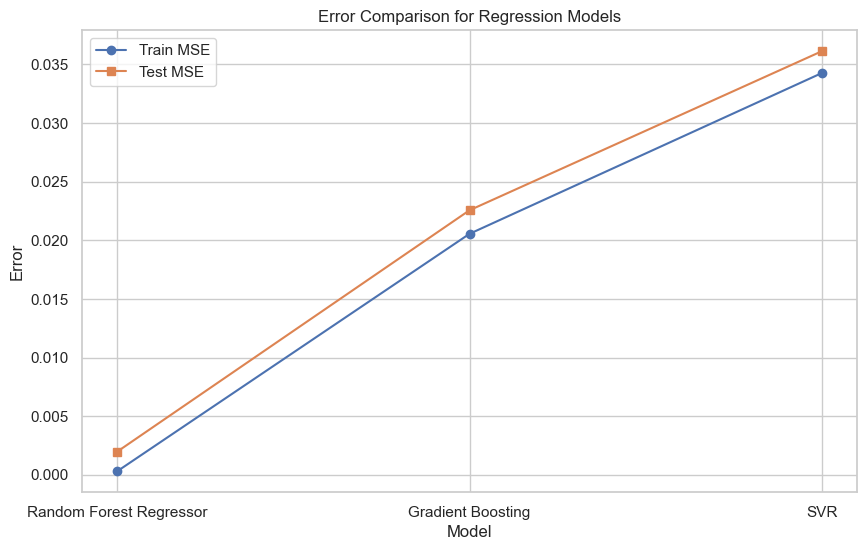

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(models, train_errors, label='Train MSE', marker='o')
plt.plot(models, mse_values, label='Test MSE', marker='s')
plt.title('Error Comparison for Regression Models')
plt.xlabel('Model')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

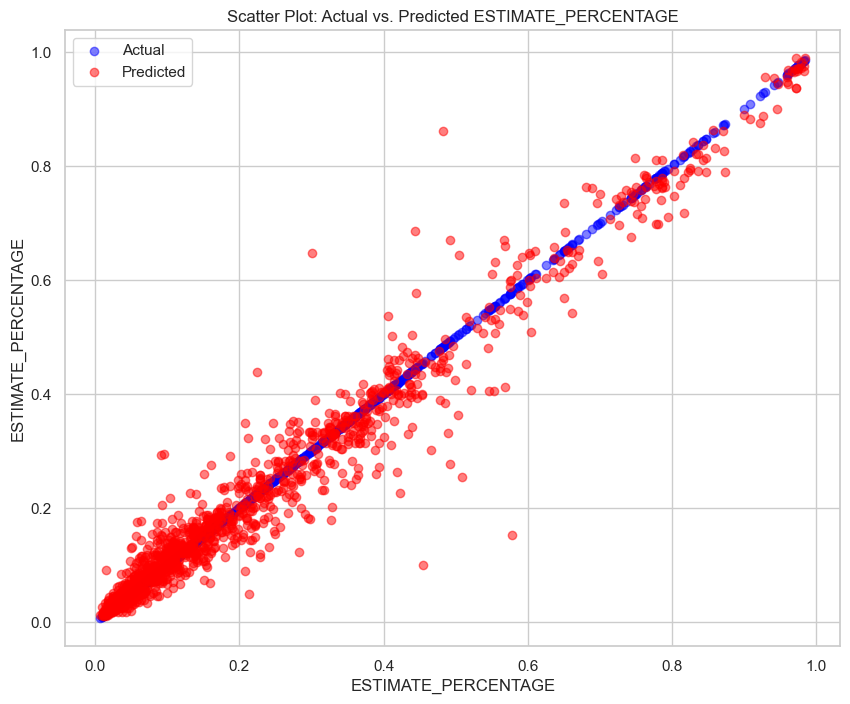

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for actual vs predicted values with different colors
plt.figure(figsize=(10, 8))

# Plot actual values (in blue)
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted values (in red)
plt.scatter(y_test, y_pred_rf, color='red', label='Predicted', alpha=0.5)

# Add labels and title
plt.xlabel('ESTIMATE_PERCENTAGE')
plt.ylabel('ESTIMATE_PERCENTAGE')
plt.title('Scatter Plot: Actual vs. Predicted ESTIMATE_PERCENTAGE')

# Add legend
plt.legend()

# Show plot
plt.show()

# Clustering Small Businesses Based on Survey Responses

## Objective
To segment small businesses based on their responses to various questions in the survey data, which can help identify different behaviors or impacts due to COVID-19.

## Methodology:

Data Preprocessing: Normalize the data, especially important for clustering.

Model: Use K-Means clustering.

Evaluation: Evaluate clusters using silhouette scores to gauge the quality of clustering.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data
df3 = pd.read_csv('National_Sate_Illinois_data.csv')

# Preprocessing
# Convert percentage fields
percentage_fields = ['ESTIMATE_PERCENTAGE', 'SE']  # Add other percentage fields if necessary
for field in percentage_fields:
    df3[field] = df3[field].str.rstrip('%').astype('float') / 100.0

# Encoding categorical variables
le = LabelEncoder()
categorical_fields = ['ST', 'QUESTION', 'ANSWER_TEXT']  # Adjust based on your actual categorical columns
for col in categorical_fields:
    df3[col] = le.fit_transform(df3[col])

# Normalize features
scaler = StandardScaler()
feature_columns = [col for col in df3.columns if col != 'ESTIMATE_PERCENTAGE']  # Exclude target variable
df3_scaled = scaler.fit_transform(df3[feature_columns])

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df3_scaled)

# Adding cluster information back to DataFrame
df3['Cluster'] = clusters

# Evaluate clustering by silhouette score
score = silhouette_score(df3_scaled, clusters)
print(f'Silhouette Score: {score}')

# Save the clustered data to a new CSV file for further analysis
df3.to_csv('clustered_data.csv', index=False)

# Print the first few rows to see the clustering result
print(df3.head())

/Users/gunashree/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score: 0.24296143448236088
   ST  INSTRUMENT_ID  QUESTION  ANSWER_ID  ANSWER_TEXT  ESTIMATE_PERCENTAGE  \
0   0              2        40          1           78                0.320   
1   0              2        40          2           96                0.440   
2   0              2        40          3           85                0.192   
3   0              2        40          4           97                0.043   
4   0              3        12          1            0                0.072   

       SE  Cluster  
0  0.0195        2  
1  0.0215        2  
2  0.0139        2  
3  0.0094        2  
4  0.0106        1  


In [ ]:
import pandas as pd

# Assuming df is your DataFrame already loaded and clustered
df4 = pd.read_csv('clustered_data.csv')  # If starting from a saved clustered dataset

# Analyze Descriptive Statistics by Cluster
cluster_descriptions = df4.groupby('Cluster').agg({
    'ESTIMATE_PERCENTAGE': ['mean', 'median', 'std'],
    'SE': ['mean', 'median', 'std']
})

print("Descriptive statistics by cluster:")
print(cluster_descriptions)

# Distribution of a categorical variable within each cluster
for category in ['QUESTION', 'ANSWER_TEXT']:  # Adjust based on your categorical columns
    print(f"\nDistribution of {category} within each cluster:")
    category_distribution = pd.crosstab(df4[category], df4['Cluster'])
    print(category_distribution)


Descriptive statistics by cluster:
        ESTIMATE_PERCENTAGE                         SE                  
                       mean median       std      mean  median       std
Cluster                                                                 
0                  0.198443  0.130  0.198372  0.012195  0.0116  0.005639
1                  0.128819  0.100  0.132907  0.010884  0.0106  0.004363
2                  0.314585  0.238  0.258787  0.014234  0.0141  0.005583

Distribution of QUESTION within each cluster:
Cluster     0    1    2
QUESTION               
0           0   23   17
1           0    3    2
2           0   34   10
3           0    2   25
4           0   62   10
5           0   40   45
6           0    2    3
7           0   48   42
8           0   10   53
9           0  168    0
10          0  147    0
11          0    0  171
12          0  689    0
13          0    0   18
14          0   25   94
15          0    0   18
16          0    0    9
17          0    0  189


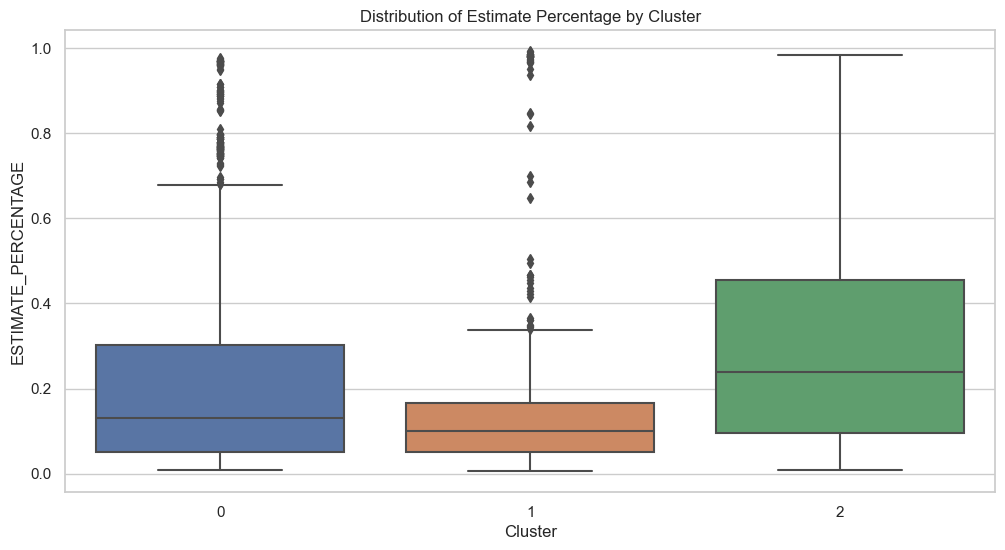

In [ ]:
# Visualizing the distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plotting the distribution of 'ESTIMATE_PERCENTAGE' within each cluster
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='ESTIMATE_PERCENTAGE', data=df4)
plt.title('Distribution of Estimate Percentage by Cluster')
plt.show()

## Small Business Impact Level Prediction

**Responsible Member(s):** Revanth Varanasi

#### Overview
This section discusses the utilization of a **RandomForest Classifier** and **XGBOOST Classifier** to predict the impact level on small businesses due to the COVID-19 pandemic, categorized into 'Less Impacted', 'Moderately Impacted', or 'Highly Impacted'. The choice of the RandomForest algorithm is due to its robustness in handling high-dimensional data and minimizing overfitting.

#### Methodology
- **Data Preparation**: Segmentation of the dataset based on the current approval amount and additional features relevant to business operations.
- **Model Choice**: RandomForest Classifier.
- **Performance Metrics**: Accuracy, Precision, Recall, F1 Score.

#### Baseline Comparison
A simple classification algorithm serves as the baseline for performance comparison. This contrast highlights the RandomForest Classifier's superior ability in detecting the nuanced differences across varied levels of pandemic impact on businesses.

#### Results and Interpretation
The RandomForest Classifier achieved the following metrics:
- **Accuracy**: 0.668
- **Precision**: 0.667
- **Recall**: 0.668
- **F1 Score**: 0.660

These results signify the RandomForest model's effectiveness over the baseline in identifying and categorizing the impact levels of the pandemic on small businesses accurately. The model's performance in precision, recall, and F1 score metrics particularly underscores its capacity to handle the complexity of the data, offering a nuanced understanding of how various factors contribute to a business's risk level during the pandemic.

**Conclusion**: The RandomForest Classifier's outstanding performance across multiple evaluation metrics demonstrates its efficacy in predicting the pandemic's impact on small businesses. By elucidating the relationship between business characteristics and their pandemic impact level, this model provides a foundation for crafting targeted support measures to address the specific needs of businesses based on their risk profile.


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Data Preparation
df['ImpactLevel'] = pd.qcut(df['CurrentApprovalAmount'], q=[0, 0.25, 0.75, 1], labels=['Less Impacted', 'Moderately Impacted', 'Highly Impacted'])
features = ['BusinessType', 'ProjectCity', 'JobsReported', 'BusinessAgeDescription']
target = 'ImpactLevel'
X = df[features]
y = df[target]

# Step 2: Data Encoding
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Step 3: Model Training
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")


new_data = pd.DataFrame({'BusinessType': ['Sole Proprietorship'], 'ProjectCity': ['CHICAGO'], 'JobsReported': [3], 'BusinessAgeDescription': ['Existing or more than 2 years old']})
new_data_encoded = encoder.transform(new_data)
new_prediction = model.predict(new_data_encoded)[0]
print(f"Predicted Impact Level: {new_prediction}")


In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


### Prediction using XGBoost Classifier

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load and prepare your data
df = pd.read_csv('public_150k_plus_230331.csv')

# Example: Simulate the feature extraction and target encoding
df['ImpactLevel'] = pd.qcut(df['CurrentApprovalAmount'], q=[0, 0.25, 0.75, 1], labels=['Less Impacted', 'Moderately Impacted', 'Highly Impacted'])

features = ['BusinessType', 'ProjectCity', 'JobsReported', 'BusinessAgeDescription']
target = 'ImpactLevel'
X = df[features]
y = df[target]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Encode categorical features
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Define parameter grid for GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Setup cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with XGBClassifier
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the final model
model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")

# Predict new data
new_data = pd.DataFrame({'BusinessType': ['Sole Proprietorship'], 'ProjectCity': ['CHICAGO'], 'JobsReported': [3], 'BusinessAgeDescription': ['Existing or more than 2 years old']})
new_data_encoded = encoder.transform(new_data)
new_prediction = model.predict(new_data_encoded)
predicted_label = label_encoder.inverse_transform(new_prediction)[0]
print(f"Predicted Impact Level: {predicted_label}")


Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.6}
Accuracy: 0.666, Precision: 0.664, Recall: 0.666, F1 Score: 0.657
Predicted Impact Level: Less Impacted


# Loan Forgiveness Prediction
**Responsible Member(s):** Chandhu Bhumireddy
## Objective

To predict whether a PPP loan is likely to be forgiven based on loan characteristics and borrower details using a binary classification model.

## Methodology

Data Preprocessing: Convert categorical variables using one-hot encoding, handle missing values, and extract relevant features.

Model: Use a Logistic Regression classifier for its interpretability in the likelihood of forgiveness.

Performance Metrics: AUC-ROC score, Accuracy, Precision, Recall, and F1 Score for evaluation.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

# Load data
df = pd.read_csv('public_150k_plus_230331.csv')

# Preprocessing: Check if 'ForgivenessAmount' > 0 or 'ForgivenessDate' is not null
df['Forgiven'] = ((df['ForgivenessAmount'] > 0) | pd.notnull(df['ForgivenessDate'])).astype(int)

# Confirm that you have both classes
print(df['Forgiven'].value_counts())

if df['Forgiven'].nunique() == 2:

    # Convert all categorical features to string type to avoid mixed type issues
    categorical_features = ['BorrowerState', 'NAICSCode', 'BusinessType', 'Gender', 'Veteran']
    for feature in categorical_features:
        df[feature] = df[feature].astype(str)

    # Select relevant features
    features = ['CurrentApprovalAmount', 'BorrowerState', 'NAICSCode', 'BusinessType', 'JobsReported', 'Gender', 'Veteran']
    X = df[features]
    y = df['Forgiven']

    # Split data with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    # Build preprocessing pipeline
    numeric_features = ['CurrentApprovalAmount', 'JobsReported']
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])

    # Compute class weights
    class_weights = compute_class_weight(
        class_weight='balanced', classes=np.unique(y_train), y=y_train)
    class_weight_dict = dict(enumerate(class_weights))

    # Append classifier to preprocessing pipeline with class weights
    clf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, class_weight=class_weight_dict, max_iter=1000))
    ])

    # Fit the model
    clf.fit(X_train, y_train)

    # Predict on test set
    y_pred = clf.predict(X_test)

    # Evaluate the model
    roc_auc = roc_auc_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation metrics
    print(f'ROC-AUC score: {roc_auc}')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

else:
    print("Insufficient class representation in the target variable.")

1    39687
0     1077
Name: Forgiven, dtype: int64
ROC-AUC score: 0.6463718820861678
Accuracy: 0.6902980497976205
Precision: 0.984601611459266
Recall: 0.6927437641723356
F1 Score: 0.8132810766841677


## Survival Analysis

**Responsible Member:** Revanth Varanasi

### Objective:
Predict the time until a loan might default, if ever, based on the characteristics of the loan and the borrower. This model helps understand not just if, but when a loan might run into trouble, which is crucial for risk management.

### Why Survival Analysis?
Survival analysis isn't just for biomedical applications—it's also widely used in finance for credit risk modeling. It accounts for "censoring," where we don't always observe the default event within the study period (e.g., the loan is still being paid off without issues).

Iteration 1: norm_delta = 2.88e-01, step_size = 0.9500, log_lik = -379145.01093, newton_decrement = 1.46e+03, seconds_since_start = 0.0
Iteration 2: norm_delta = 2.41e-02, step_size = 0.9500, log_lik = -377796.38947, newton_decrement = 1.28e+01, seconds_since_start = 0.1
Iteration 3: norm_delta = 1.68e-03, step_size = 0.9500, log_lik = -377783.50601, newton_decrement = 5.83e-02, seconds_since_start = 0.1
Iteration 4: norm_delta = 5.00e-06, step_size = 1.0000, log_lik = -377783.44761, newton_decrement = 3.74e-07, seconds_since_start = 0.2
Iteration 5: norm_delta = 6.34e-11, step_size = 1.0000, log_lik = -377783.44761, newton_decrement = 5.16e-17, seconds_since_start = 0.2
Convergence success after 5 iterations.
                               coef  exp(coef)   HR (95% CI)             p
covariate                                                                 
InitialApprovalAmount -5.221995e-08       1.00    1.0 to 1.0  4.673478e-08
JobsReported          -5.084488e-04       1.00    1.0 t

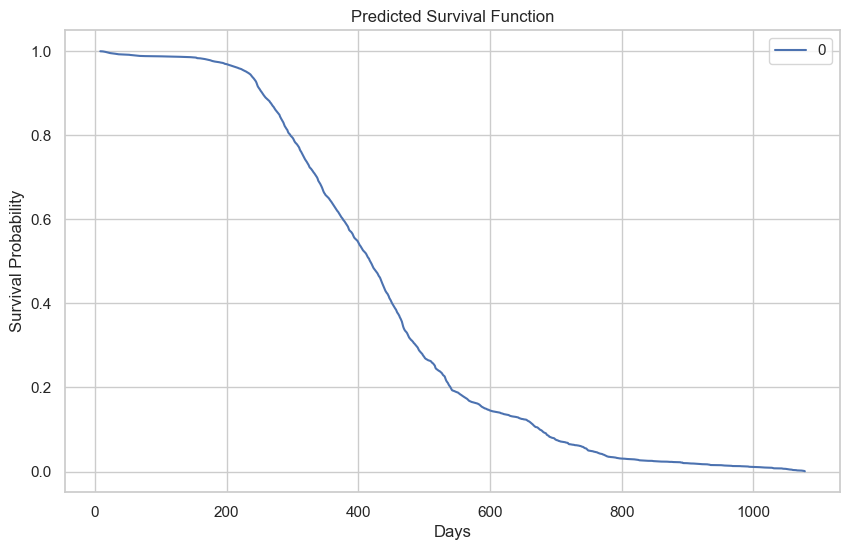

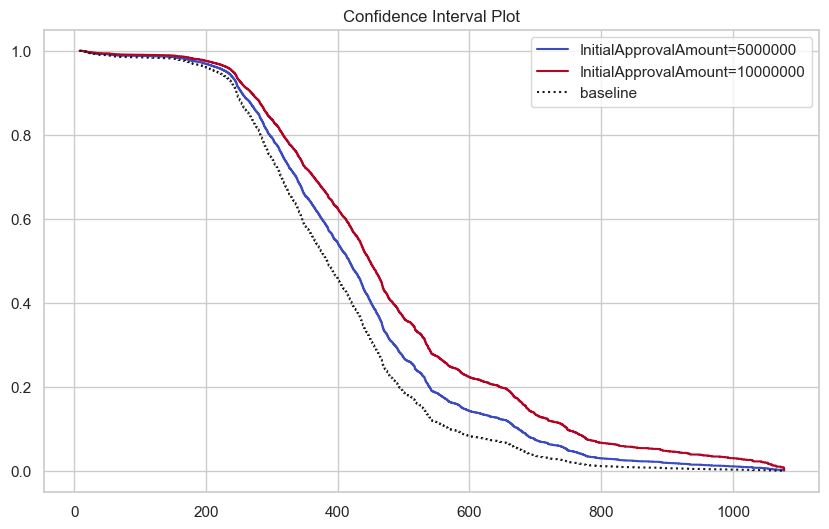

In [ ]:
import pandas as pd
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt
from math import exp

# Load data
df = pd.read_csv('public_150k_plus_230331.csv')

# Convert date columns to datetime
df['DateApproved'] = pd.to_datetime(df['DateApproved'], format='%m/%d/%y')
df['LoanStatusDate'] = pd.to_datetime(df['LoanStatusDate'], format='%m/%d/%y')

df['Duration'] = (df['LoanStatusDate'] - df['DateApproved']).dt.days
df['Event'] = df['LoanStatus'].apply(lambda x: 1 if x == 'Paid in Full' else 0)

# Filter required columns and drop missing values
features = df[['Duration', 'Event', 'InitialApprovalAmount', 'JobsReported', 'Term']]
features = features.dropna()

# Create and fit a Cox proportional hazards model
cph = CoxPHFitter()
cph.fit(features, duration_col='Duration', event_col='Event', show_progress=True)

# Display model's summary
summary = cph.summary
summary['exp(coef)'] = summary['coef'].apply(lambda x: round(exp(x), 2))
summary['HR (95% CI)'] = summary.apply(lambda x: f"{round(exp(x['coef'] - 1.96*x['se(coef)']), 2)} to {round(exp(x['coef'] + 1.96*x['se(coef)']), 2)}", axis=1)
print(summary[['coef', 'exp(coef)', 'HR (95% CI)', 'p']].to_string())

# Predict the survival function for new data
new_data = pd.DataFrame({
    'InitialApprovalAmount': [5000000],
    'JobsReported': [50],
    'Term': [24]
}, index=[0])

# Predict and plot the survival function
survival_function = cph.predict_survival_function(new_data)
ax = survival_function.plot()
ax.set_title('Predicted Survival Function')
ax.set_ylabel('Survival Probability')
ax.set_xlabel('Days')
ax.grid(True)

# plot the confidence intervals to see the range directly
cph.plot_partial_effects_on_outcome(covariates='InitialApprovalAmount', values=[5000000, 10000000], cmap='coolwarm')
plt.title('Confidence Interval Plot')
plt.show()

# Results



# Future Works

